In [1]:
# The causalTree package is not in CRAN, the most common R repository.
# To install it, uncomment the next lines as appropriate.
# install.packages("devtools")  # if you don't have this installed yet.
# devtools::install_github('susanathey/causalTree') 

library(causalTree)
# use e.g., install.packages("grf") to install any of the following packages.
library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(lmtest)
library(sandwich)
library(ggplot2)
library(haven)

Loading required package: rpart

Loading required package: rpart.plot

Loading required package: data.table

Loading required package: Matrix

Loaded glmnet 4.1-4

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [189]:
data <- read_dta("C:/Users/sandr/Dropbox/MGTECON634_Project/data/matching_panel5_treat12.dta")

In [196]:
attach(data)

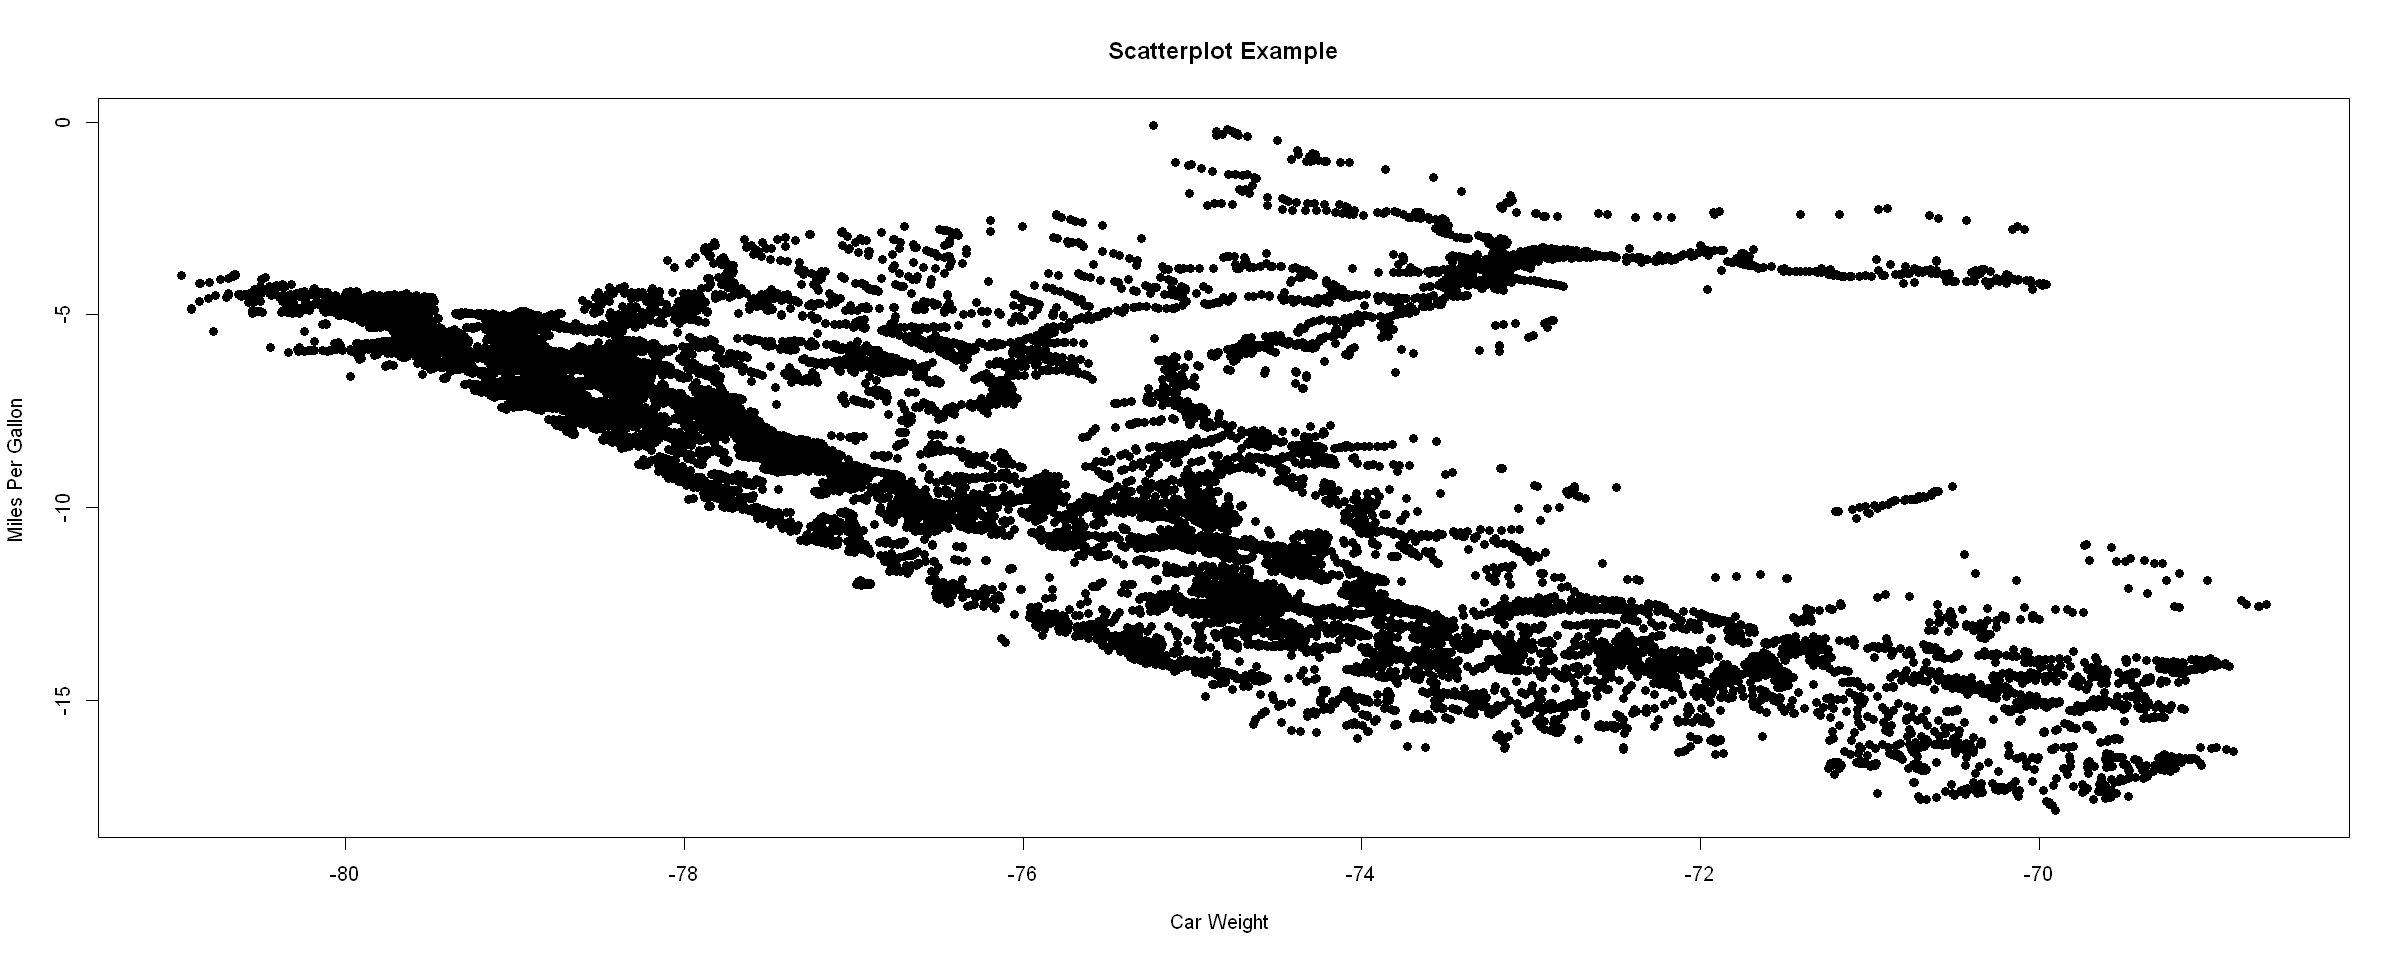

In [198]:
plot(nlong_ie, nlat_ie, main="Scatterplot Example",
   xlab="Car Weight ", ylab="Miles Per Gallon ", pch=19)

In [3]:
is.data.frame(data)

[1] TRUE

In [4]:
# stay treat12 tenured level sex age clasification cpelec cpwater

# Clean Data

In [4]:
# Dummy for sex, and categorical values for level and clasification 
data$sex[data$sex == 1] <- 1
data$sex[data$sex == 2] <- 0
data$level <- as.factor(data$level)
data$clasification <- as.factor(data$clasification)

In [5]:
outcome <- "stay"
treatment <- "treat12"
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

# Replicate main Results

In [6]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==1 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 1 & strict_qualified == 
    1 & ano == 2016))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98581  0.05739  0.08545  0.11004  0.19524 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.7054709  0.0176330  40.009   <2e-16 ***
treat12                 0.0002453  0.0040631   0.060   0.9519    
tenured                        NA         NA      NA       NA    
sex                    -0.0094226  0.0040820  -2.308   0.0210 *  
age                     0.0037790  0.0002617  14.439   <2e-16 ***
factor(level)2          0.0083060  0.0099193   0.837   0.4024    
factor(level)3          0.0049741  0.0113954   0.436   0.6625    
factor(clasification)2 -0.0086832  0.0065443  -1.327   0.1846    
factor(clasification)3 -0.0004257  0.0073458  -0.058   0.9538    
cpelec                  0.0227707  0.0094413   2.412   0.0159 *  
cpwater   

In [7]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Qualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 0 & strict_qualified == 
    1 & ano == 2016))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4330 -0.2964 -0.2522  0.6522  0.8336 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.110352   0.020276   5.442 5.30e-08 ***
treat12                 0.047713   0.006041   7.898 2.94e-15 ***
tenured                       NA         NA      NA       NA    
sex                     0.007348   0.006219   1.181   0.2374    
age                     0.003071   0.000405   7.584 3.47e-14 ***
factor(level)2          0.004622   0.008742   0.529   0.5970    
factor(level)3          0.009403   0.011835   0.794   0.4269    
factor(clasification)2 -0.008398   0.009140  -0.919   0.3582    
factor(clasification)3  0.062801   0.010961   5.729 1.02e-08 ***
cpelec                 -0.020036   0.010036  -1.996   0.0459 *  
cpwater                 0.00993

In [8]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Unqualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 0 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
ols.res


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             0.1248870  0.0494152  2.5273 0.0115435 *  
treat12                 0.0408633  0.0209398  1.9515 0.0510916 .  
sex                    -0.0022900  0.0201888 -0.1134 0.9096973    
age                     0.0040742  0.0010582  3.8501 0.0001205 ***
factor(level)2         -0.0560187  0.0254597 -2.2003 0.0278596 *  
factor(level)3         -0.0599011  0.0321866 -1.8611 0.0628302 .  
factor(clasification)2  0.0320481  0.0249825  1.2828 0.1996507    
factor(clasification)3  0.0912484  0.0297241  3.0698 0.0021602 ** 
cpelec                 -0.0072515  0.0189478 -0.3827 0.7019619    
cpwater                -0.0298502  0.0211662 -1.4103 0.1585591    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# Via causal trees

In [11]:
# # Only valid for randomized data!
# fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))
# X <- model.matrix(fmla, data)

In [12]:
# fmla <- formula(stay ~  tenured + sex + age)
# fmla

In [13]:
# # Prepare dataset
# fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# X <- model.matrix(fmla, data)

In [14]:
#stay treat12 tenured level sex age clasification cpelec cpwater

## Data from temporary teachers in 2016

In [9]:
data_main_col <- data.frame(data$stay, data$treat12,data$tenured, 
                            data$level, data$sex, data$age, data$clasification, 
                            data$cpelec, data$cpwater, data$nlat_ie, data$nlong_ie,
                           data$x_dim, data$y_dim, data$ano)
 
names(data_main_col) <- c('stay', 'treat12', 'tenured', 'level', 'sex', 'age', 
                       'clasification', 'cpelec', 'cpwater', "nlat_ie", "nlong_ie", "x_dim", "y_dim", "ano")
data_clean = na.omit(data_main_col)

In [10]:
data_clean <- subset(data_clean, ano== 2016 & tenured == 0)

In [11]:
dim(data_clean)

[1] 29606    14

# Using Blocks

In [12]:
data[,"clasification"] <- as.integer(as.character(data[,"clasification"]))
data[,"level"] <- as.integer(as.character(data[,"level"]))
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "x_dim", "y_dim")

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"
Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"


In [21]:
str(data)

tibble [251,297 x 255] (S3: tbl_df/tbl/data.frame)
 $ ano                       : num [1:251297] 2015 2014 2015 2014 2014 ...
  ..- attr(*, "label")= chr "Year"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ dni_nexus                 : num [1:251297] 29543412 16614859 16732242 41089828 16732242 ...
  ..- attr(*, "label")= chr "Teacher ID"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ archivo                   : num [1:251297] 201512 201412 201512 201412 201412 ...
  ..- attr(*, "label")= chr "File source"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ cod_mod                   : num [1:251297] 2212 2212 2212 2212 2212 ...
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ codplaza                  : chr [1:251297] "522401218112" "522421218113" "522421218117" "522421218117" ...
  ..- attr(*, "format.stata")= chr "%12s"
 $ codcargo                  : chr [1:251297] "13048" "13048" "13048" "13048" ...
  ..- attr(*, "format.stata")= chr "%5s"
 $ codtipotrab               : chr [1:251297] "10" 

In [24]:
data[,"level"]

ERROR: Error in parse(text = x, srcfile = src): <text>:1:15: unexpected symbol
1: data[,"level"].head
                  ^


In [22]:
class(str(data[,"level"]))

tibble [251,297 x 1] (S3: tbl_df/tbl/data.frame)
 $ level: int [1:251297] NA NA NA NA NA NA NA NA NA NA ...


[1] "NULL"

In [13]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

# fmla <- formula(stay ~  treat12 + tenured + sex + age + 
#                         factor(level) + factor(clasification) 
#                         + cpelec + cpwater + x_dim + y_dim)
ols <- lm(fmla, data=data_clean)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5311 -0.2939 -0.2460  0.6480  0.8594 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.275e-02  2.574e-02  -2.826  0.00472 ** 
tenured                NA         NA      NA       NA    
level2         -2.138e-03  8.049e-03  -0.266  0.79055    
level3          1.579e-02  1.064e-02   1.484  0.13781    
sex             4.689e-03  5.819e-03   0.806  0.42042    
age             3.209e-03  3.584e-04   8.955  < 2e-16 ***
clasification2 -5.211e-03  8.418e-03  -0.619  0.53592    
clasification3  4.976e-02  9.850e-03   5.052 4.39e-07 ***
cpelec         -3.274e-03  8.469e-03  -0.387  0.69907    
cpwater         2.396e-02  5.903e-03   4.059 4.94e-05 ***
x_dim           1.067e-04  1.292e-05   8.257  < 2e-16 ***
y_dim           1.262e-04  1.010e-05  12.500  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.0

In [14]:
# Dividing data into three subsets
indices <- split(seq(nrow(data_clean)), sort(seq(nrow(data_clean)) %% 3))
names(indices) <- c('split', 'est', 'test')

In [15]:
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + x_dim + y_dim

In [16]:
dim(data_clean)

[1] 29606    14

In [539]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=100,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)


[1] 2
[1] "CT"


In [540]:
# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

In [541]:
# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

In [542]:
# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

In [543]:
# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

In [544]:
num.leaves

[1] 6

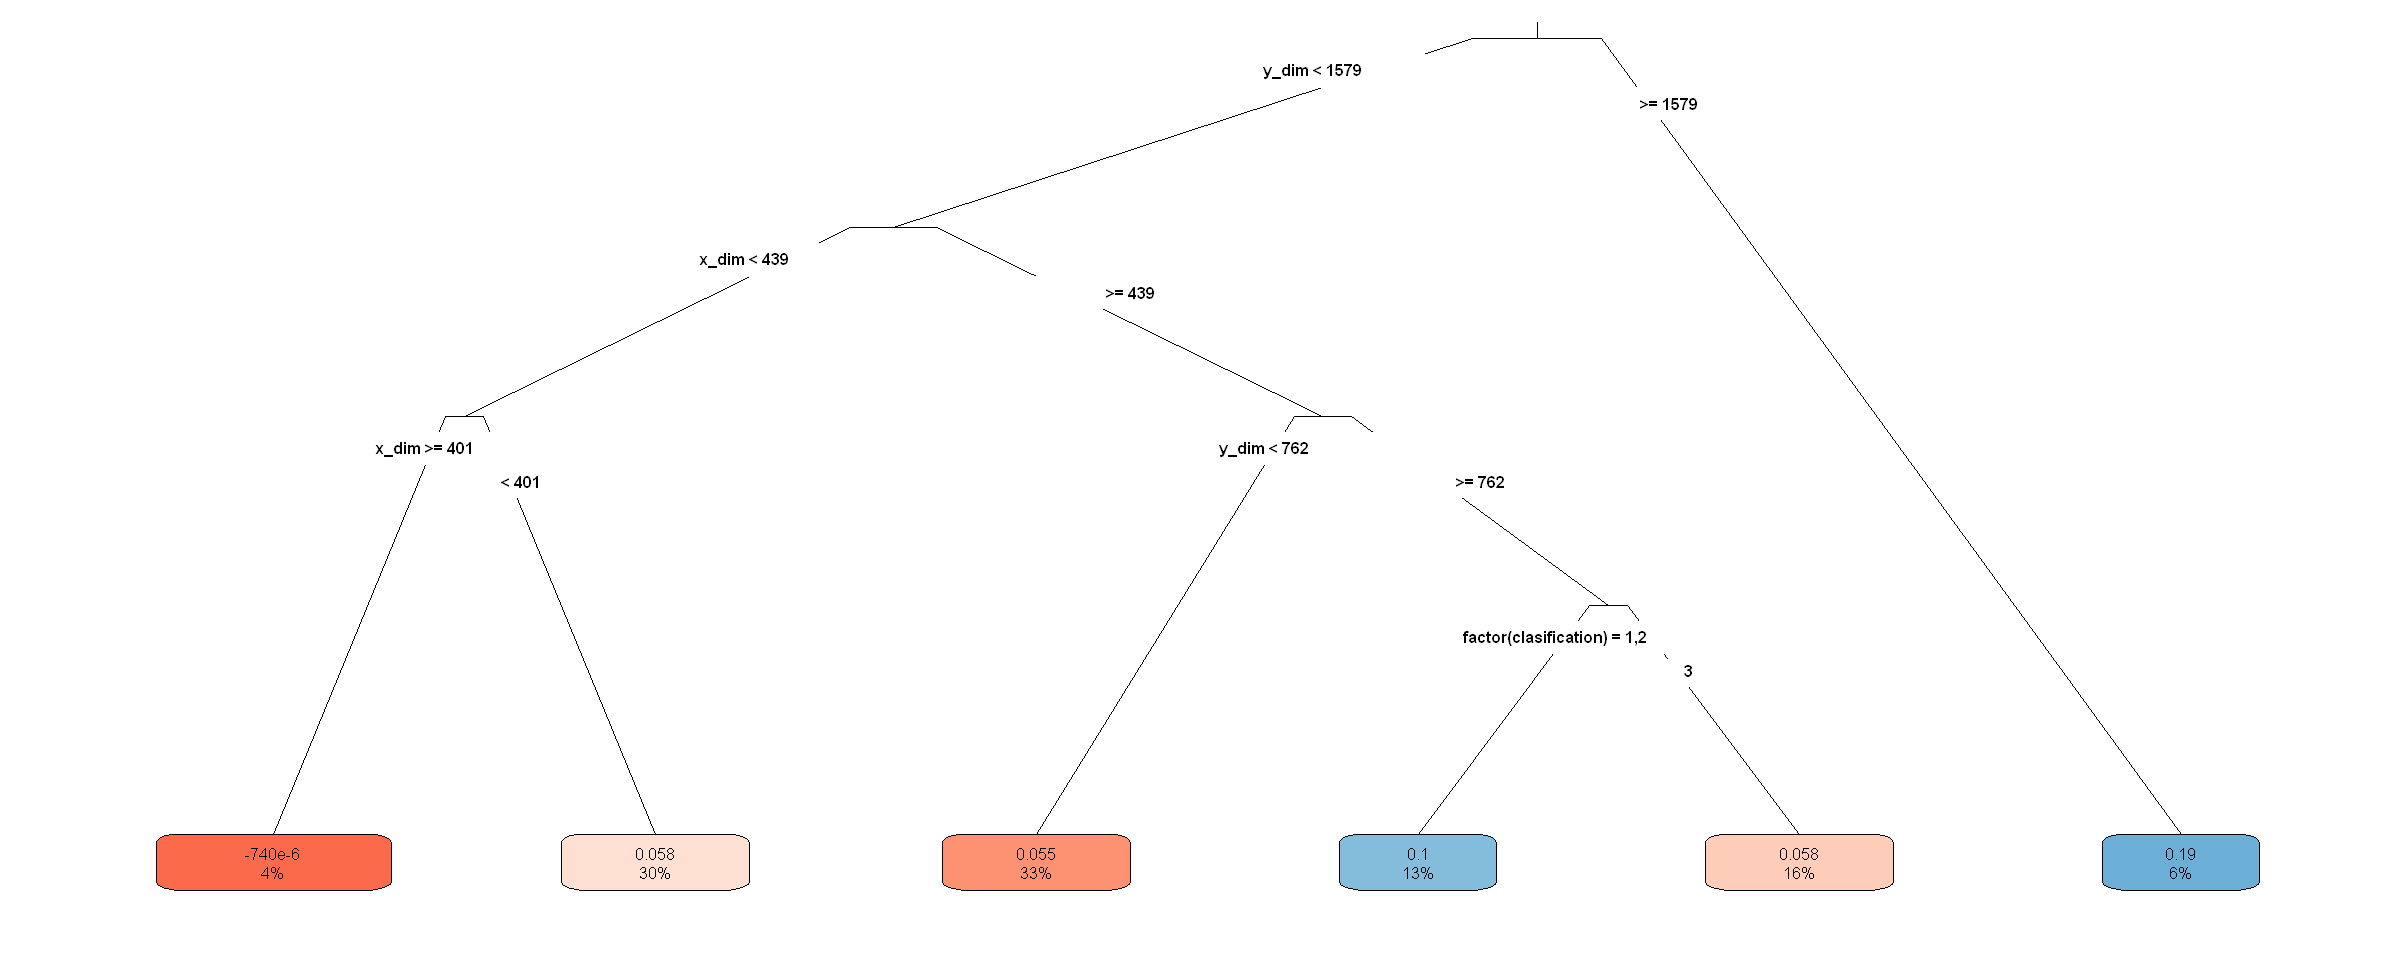

In [545]:
options(repr.plot.width=20, repr.plot.height=8)
rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu", # Palette for coloring the node
  cex = 0.8,
  xcompact=FALSE,
  ycompact=FALSE)

# Using Lat and Longitud

In [32]:
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + nlat_ie + nlong_ie)
fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

fmla

[1] "stay  ~ tenured + level + sex + age + clasification + cpelec + cpwater + nlat_ie + nlong_ie"

[1] 2
[1] "CT"


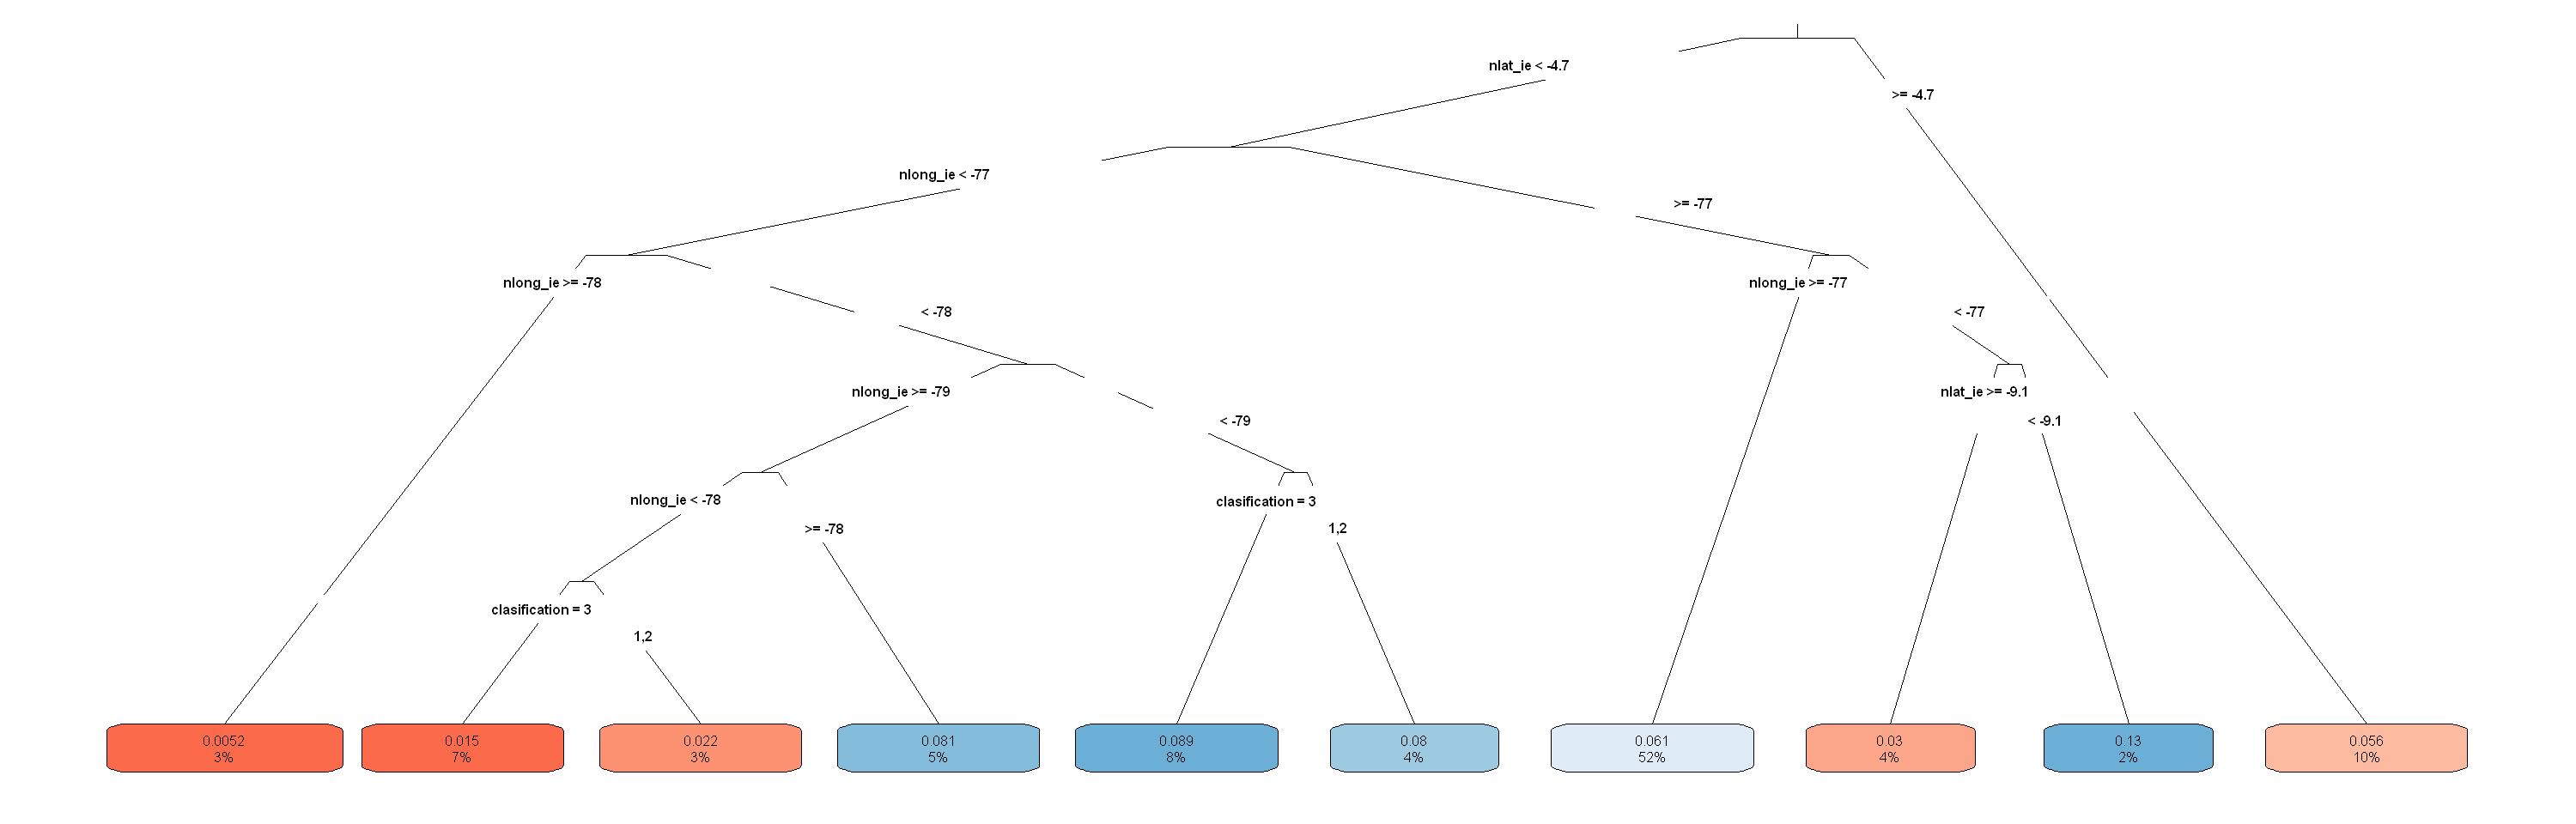

In [35]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=120,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

options(repr.plot.width=25, repr.plot.height=8)
plot <- rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu", # Palette for coloring the node
  cex = 0.8,
  xcompact=FALSE,
  ycompact=FALSE)

In [31]:
# # Dividing data into three subsets
# indices <- split(seq(nrow(data_clean_2016)), sort(seq(nrow(data_clean_2016)) %% 3))
# names(indices) <- c('split', 'est', 'test')

In [32]:
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater )

# # Fitting the forest
# ct.unpruned <- honest.causalTree(
#   formula=fmla,            # Define the model
#   data=data_clean_2016[indices$split,],
#   treatment=data_clean_2016[indices$split, treatment],
#   est_data=data_clean_2016[indices$est,],
#   est_treatment=data_clean_2016[indices$est, treatment],
#   minsize=1,                 # Min. number of treatment and control cases in each leaf
#   HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
#   # We recommend not changing the parameters below
#   split.Rule="CT",            # Define the splitting option
#   cv.option="TOT",            # Cross validation options
#   cp=0,                       # Complexity parameter
#   split.Honest=TRUE,          # Use honesty when splitting
#   cv.Honest=TRUE              # Use honesty when performing cross-validation
# )

# # Table of cross-validated values by tuning parameter.
# ct.cptable <- as.data.frame(ct.unpruned$cptable)

# # Obtain optimal complexity parameter to prune tree.
# cp.selected <- which.min(ct.cptable$xerror)
# cp.optimal <- ct.cptable[cp.selected, "CP"]

# # Prune the tree at optimal complexity parameter.
# ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# # Predict point estimates (on estimation sample)
# tau.hat.est <- predict(ct.pruned, newdata=data_clean_2016[indices$est,])

# # Create a factor column 'leaf' indicating leaf assignment in the estimation set
# num.leaves <- length(unique(tau.hat.est))
# leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

# rpart.plot(
#   x=ct.pruned,        # Pruned tree
#   type=3,             # Draw separate split labels for the left and right directions
#   fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
#   leaf.round=1,       # Rounding of the corners of the leaf node boxes
#   extra=100,          # Display the percentage of observations in the node
#   branch=.1,          # Shape of the branch lines
#   box.palette="RdBu") # Palette for coloring the node

In [33]:
# Assuming discontinuity generates RCT

In [38]:
# Auxiliary function to computes adjusted p-values 
# following the Romano-Wolf method.
# For a reference, see http://ftp.iza.org/dp12845.pdf page 8
#  t.orig: vector of t-statistics from original model
#  t.boot: matrix of t-statistics from bootstrapped models
romano_wolf_correction <- function(t.orig, t.boot) {
  abs.t.orig <- abs(t.orig)
  abs.t.boot <- abs(t.boot)
  abs.t.sorted <- sort(abs.t.orig, decreasing = TRUE)

  max.order <- order(abs.t.orig, decreasing = TRUE)
  rev.order <- order(max.order)

  M <- nrow(t.boot)
  S <- ncol(t.boot)

  p.adj <- rep(0, S)
  p.adj[1] <- mean(apply(abs.t.boot, 1, max) > abs.t.sorted[1])
  for (s in seq(2, S)) {
    cur.index <- max.order[s:S]
    p.init <- mean(apply(abs.t.boot[, cur.index, drop=FALSE], 1, max) > abs.t.sorted[s])
    p.adj[s] <- max(p.init, p.adj[s-1])
  }
  p.adj[rev.order]
}

# Computes adjusted p-values for linear regression (lm) models.
#    model: object of lm class (i.e., a linear reg model)
#    indices: vector of integers for the coefficients that will be tested
#    cov.type: type of standard error (to be passed to sandwich::vcovHC)
#    num.boot: number of null bootstrap samples. Increase to stabilize across runs.
# Note: results are probabilitistic and may change slightly at every run. 
#
# Adapted from the p_adjust from from the hdm package, written by Philipp Bach.
# https://github.com/PhilippBach/hdm_prev/blob/master/R/p_adjust.R
summary_rw_lm <- function(model, indices=NULL, cov.type="HC2", num.boot=10000) {

  if (is.null(indices)) {
    indices <- 1:nrow(coef(summary(model)))
  }
  # Grab the original t values.
  summary <- coef(summary(model))[indices,,drop=FALSE]
  t.orig <- summary[, "t value"]

  # Null resampling.
  # This is a trick to speed up bootstrapping linear models.
  # Here, we don't really need to re-fit linear regressions, which would be a bit slow.
  # We know that betahat ~ N(beta, Sigma), and we have an estimate Sigmahat.
  # So we can approximate "null t-values" by
  #  - Draw beta.boot ~ N(0, Sigma-hat) --- note the 0 here, this is what makes it a *null* t-value.
  #  - Compute t.boot = beta.boot / sqrt(diag(Sigma.hat))
  Sigma.hat <- vcovHC(model, type=cov.type)[indices, indices]
  se.orig <- sqrt(diag(Sigma.hat))
  num.coef <- length(se.orig)
  beta.boot <- mvrnorm(n=num.boot, mu=rep(0, num.coef), Sigma=Sigma.hat)
  t.boot <- sweep(beta.boot, 2, se.orig, "/")
  p.adj <- romano_wolf_correction(t.orig, t.boot)

  result <- cbind(summary[,c(1,2,4),drop=F], p.adj)
  colnames(result) <- c('Estimate', 'Std. Error', 'Orig. p-value', 'Adj. p-value')
  result
}

In [39]:
# This is only valid in randomized datasets.
fmla <- paste0(outcome, ' ~ ', paste0(treatment, '* leaf'))
if (num.leaves == 1) {
  print("Skipping since there's a single leaf.")

} else if (num.leaves == 2) {
  # if there are only two leaves, no need to correct for multiple hypotheses
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  coeftest(ols, vcov=vcovHC(ols, 'HC2'))[4,,drop=F]

} else {
  # if there are three or more leaves, use Romano-Wolf test correction 
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  interact <- which(sapply(names(coef(ols)), function(x) grepl(paste0(treatment, ":"), x)))
  summary_rw_lm(ols, indices=interact, cov.type = 'HC2')
}

,Estimate,Std. Error,Orig. p-value,Adj. p-value
treat12:leaf2,-0.037310399,0.07038027,0.5960409,0.9800
treat12:leaf3,0.022560656,0.08151141,0.7819576,0.9829
treat12:leaf4,0.099243629,0.07876723,0.2077241,0.6384
treat12:leaf5,-0.029849596,0.06692916,0.6556193,0.9829
treat12:leaf6,-0.040622018,0.06072958,0.5035806,0.9506
treat12:leaf7,-0.092716693,0.07650302,0.2255768,0.6399
treat12:leaf8,0.026422591,0.07638460,0.7294165,0.9829
treat12:leaf9,0.026939916,0.06914270,0.6968233,0.9829
treat12:leaf10,-0.005272767,0.09226791,0.9544303,0.9829


In [36]:
# data 

# Average Covariate values wihtin each leaf

In [43]:
covariates = c("sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

In [44]:
data <- data_clean

In [39]:
# covariate = "clasification"

# fmla <- formula(paste0(covariate, "~ 0 + leaf"))
# ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
# ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))

# # Retrieve results
# avg <- ols.res[,1]
# stderr <- ols.res[,2]

# # Tally up results
# data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
#          # Used for coloring
#          scaling=pnorm((avg - mean(avg))/sd(avg)), 
#          # We will order based on how much variation is 'explain' by the averages
#          # relative to the total variation of the covariate in the data
#          variation=sd(avg) / sd(data[,covariate]),
#          # String to print in each cell in heatmap below
#          labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))

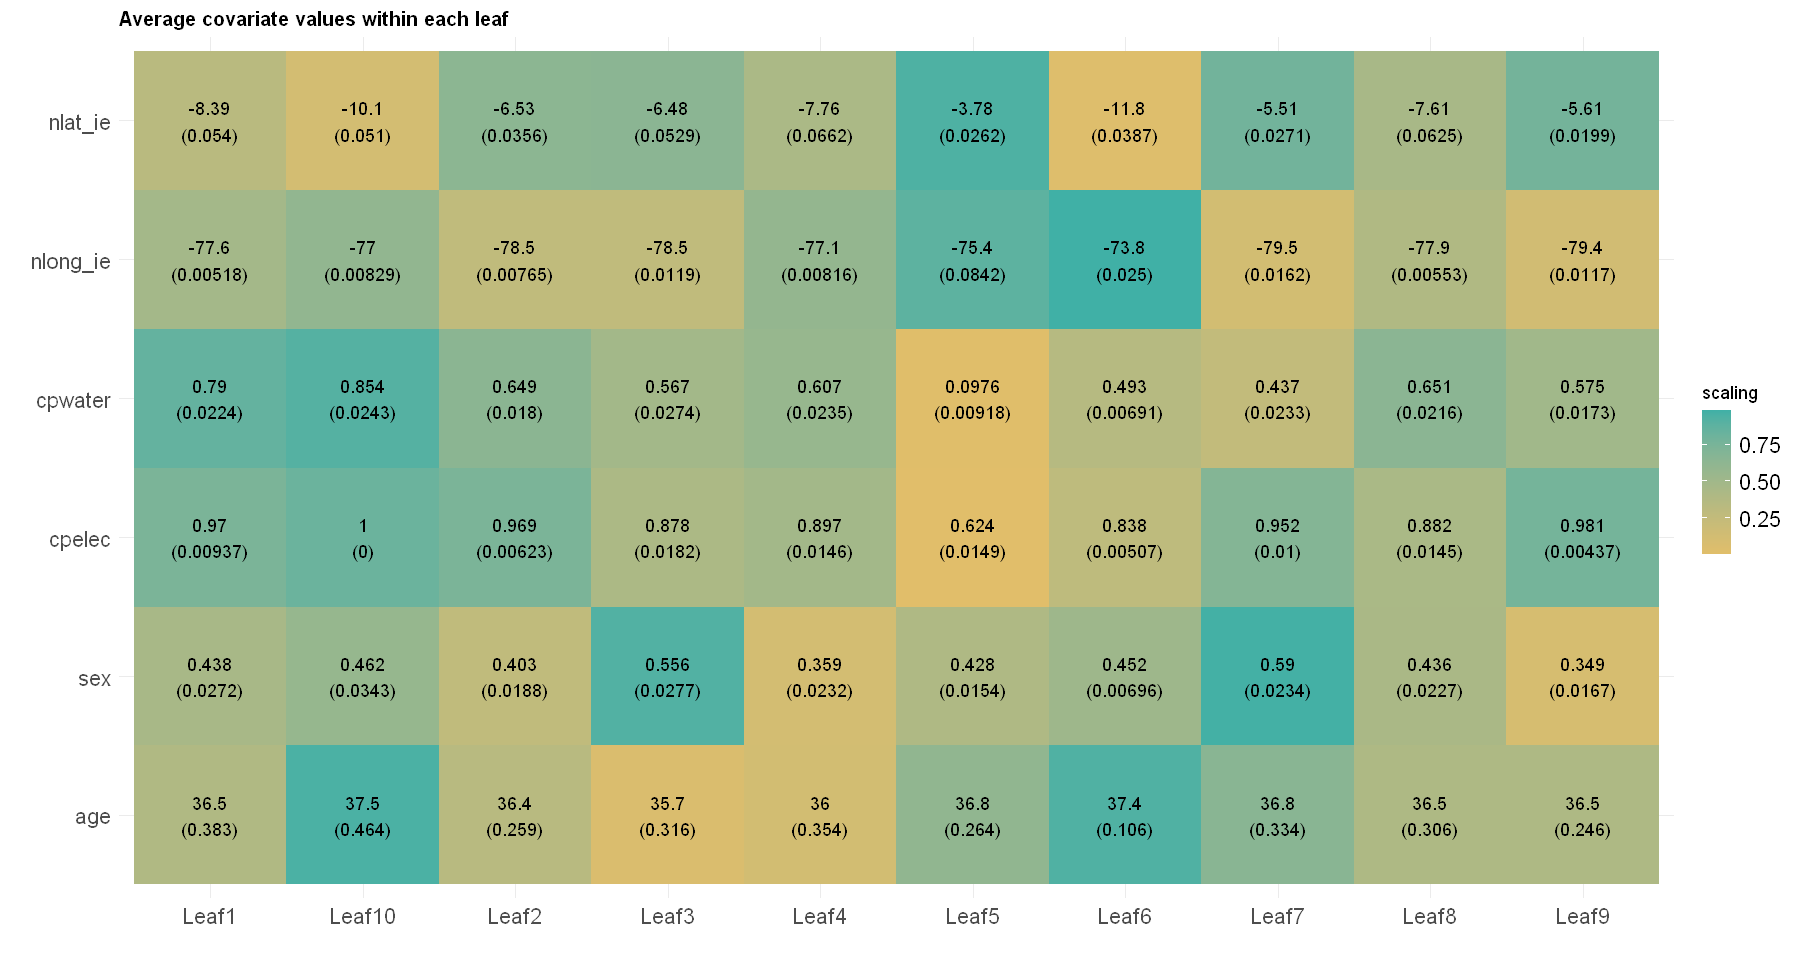

In [45]:
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per leaf (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + leaf"))
      ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)

df <- do.call(rbind, df)

# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))


# plot heatmap
options(repr.plot.width=15, repr.plot.height=8)
ggplot(df) + 
    aes(leaf, covariate, fig(50,50)) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within each leaf")) +
    theme_minimal() + 
    ylab("") + xlab("") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

# Via grf

## 1. Using LATITUDE and LONGITUDE

In [59]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)

covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

# fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + nlat_ie + nlong_ie

In [60]:
# Preparing data to fit a causal forest
# fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [61]:
forest.tau <- causal_forest(XX, Y, W)

In [62]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

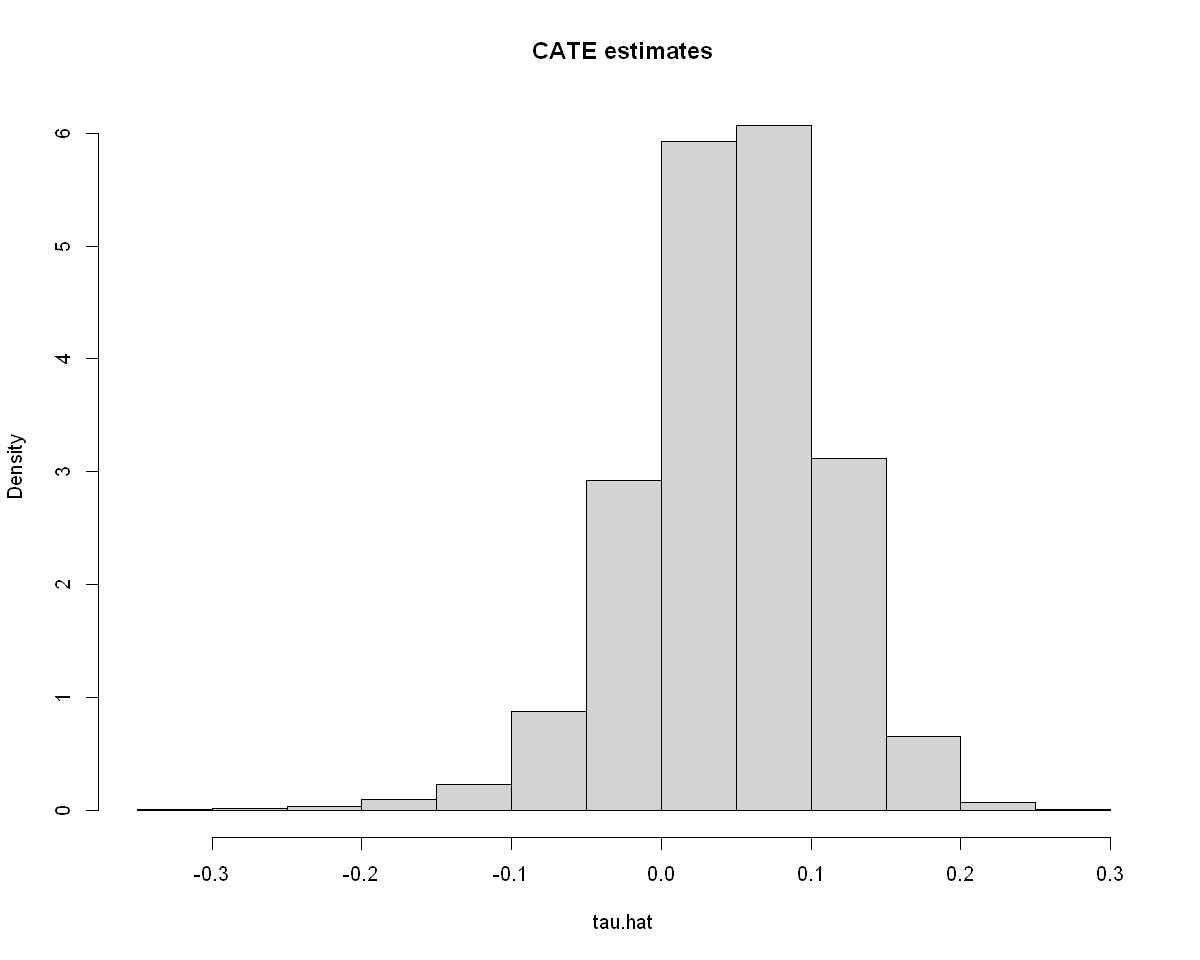

In [63]:
options(repr.plot.width=10, repr.plot.height=8)
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

### Data-driven subgroups

In [64]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

# Prepare dataset
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
n <- nrow(data)

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 10
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, W.hat=.5, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions


# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [65]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
ols,Q1,-0.009761251,0.01190678
ols,Q2,0.032280032,0.01182804
ols,Q3,0.061512058,0.01202448
ols,Q4,0.064890686,0.01213597
ols,Q5,0.064275368,0.01201259


In [66]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)
ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
aipw,Q1,-0.007615833,0.01148400
aipw,Q2,0.023700316,0.01142118
aipw,Q3,0.047467043,0.01147034
aipw,Q4,0.041188989,0.01155395
aipw,Q5,0.035806603,0.01151609


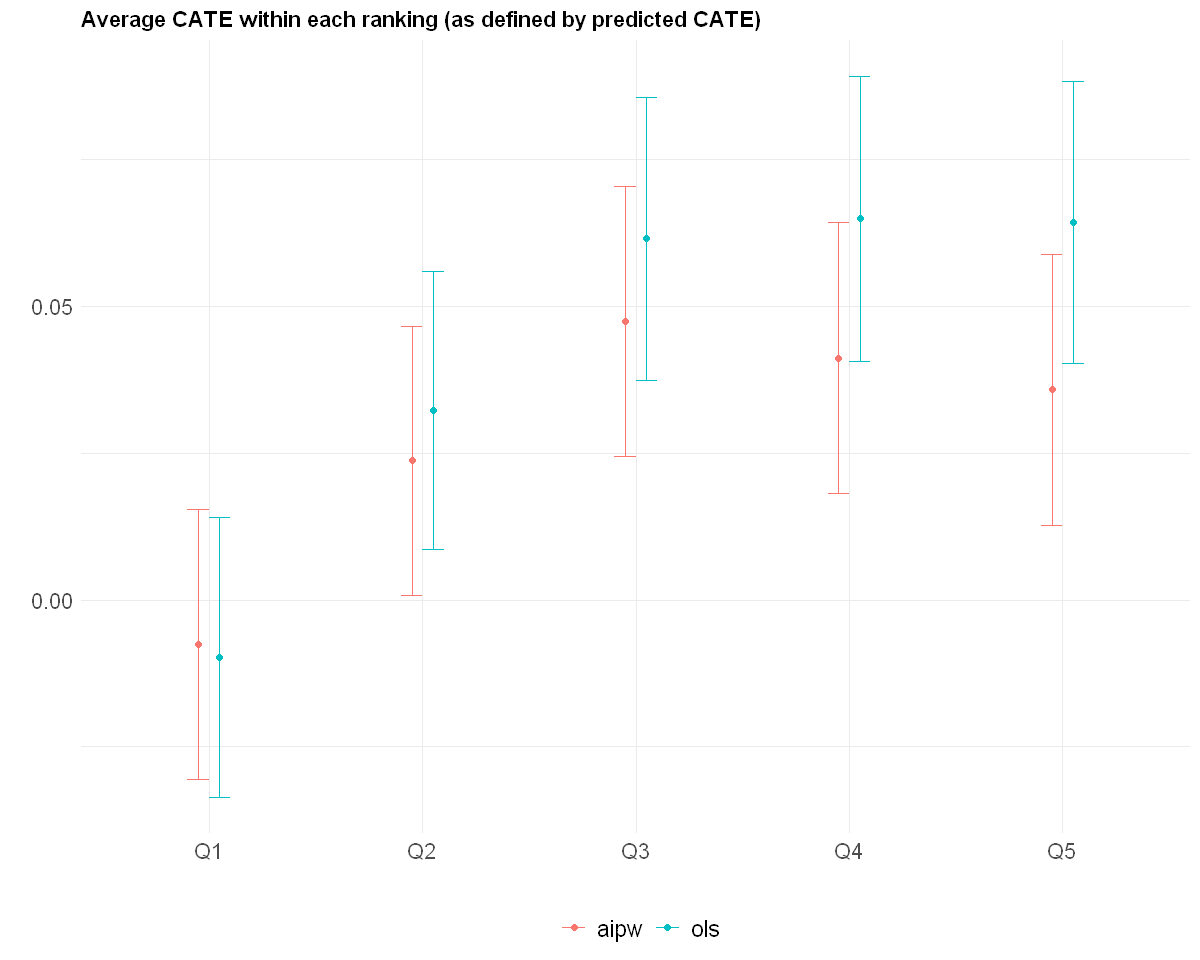

In [67]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
options(repr.plot.width=10, repr.plot.height=8)
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method, fig(50,50)) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
        axis.text=element_text(size=13), 
        legend.position="bottom", legend.title = element_blank(), legend.text = element_text(size=14))

### Test predictions using difference-in-means estimator

In [68]:
# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.04204128,0.01692887,1.301871e-02,0.0152
Rank 3 - Rank 1,0.07127331,0.01708620,3.036025e-05,0.0001
Rank 4 - Rank 1,0.07465194,0.01714261,1.336604e-05,0.0000
Rank 5 - Rank 1,0.07403662,0.01713710,1.563571e-05,0.0001


In [69]:
# Valid in randomized and observational settings with unconfoundedness+overlap.

# Using AIPW scores computed above
ols <- lm(aipw.scores ~ 1 + factor(ranking))
res <- summary_rw_lm(ols, indices=2:num.rankings)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.03131615,0.01624572,0.0539075863,0.0554
Rank 3 - Rank 1,0.05508288,0.01624503,0.0006979232,0.0025
Rank 4 - Rank 1,0.04880482,0.01624503,0.0026642271,0.0077
Rank 5 - Rank 1,0.04342244,0.01624503,0.0075224942,0.0148


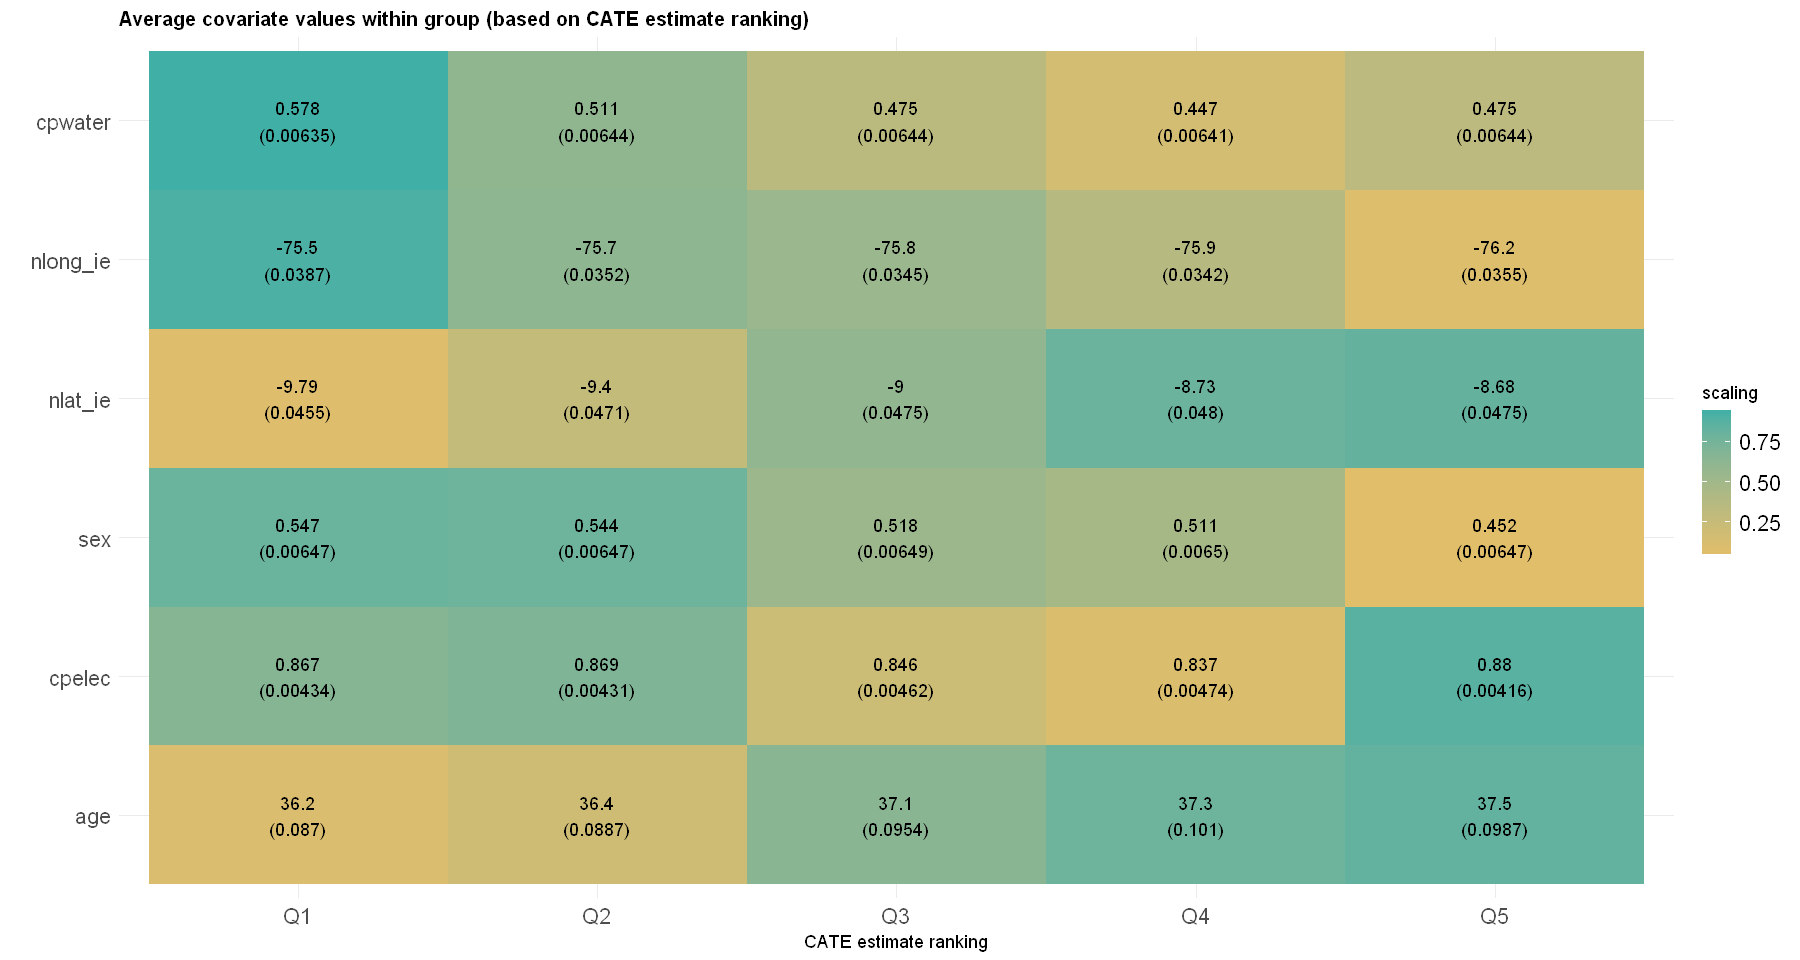

In [70]:
covariates = c("sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)
df <- do.call(rbind, df)


# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

options(repr.plot.width=15, repr.plot.height=8)
# plot heatmap
ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 
options(repr.plot.width=15, repr.plot.height=8)

### Best linear projection

In [71]:
# Best linear projection of the conditional average treatment effect on covariates
best_linear_projection(forest.tau, X)

Warning message in best_linear_projection(forest.tau, X):
"Estimated treatment propensities take values between 0.082 and 1 and in particular get very close to 0 or 1."



Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                          Estimate  Std. Error t value Pr(>|t|)   
(Intercept)            -0.01177121  0.29577071 -0.0398 0.968254   
sex                    -0.03429127  0.01113188 -3.0805 0.002069 **
age                     0.00060865  0.00062140  0.9795 0.327349   
factor.level.2         -0.02917424  0.01481175 -1.9697 0.048886 * 
factor.level.3         -0.02292223  0.01924001 -1.1914 0.233513   
factor.clasification.2 -0.00617576  0.01605127 -0.3848 0.700424   
factor.clasification.3 -0.01282469  0.01752565 -0.7318 0.464317   
cpelec                 -0.01015342  0.01724029 -0.5889 0.555909   
cpwater                -0.01823886  0.00983979 -1.8536 0.063809 . 
nlat_ie                 0.00023079  0.00293540  0.0786 0.937334   
nlong_ie               -0.00134646  0.00372352 -0.3616 0.717647   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

### Assessing heterogeneity

In [72]:
test_calibration(forest.tau)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction          1.00440    0.16729  6.0040 9.739e-10 ***
differential.forest.prediction  0.70242    0.12911  5.4407 2.675e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Partial dependence

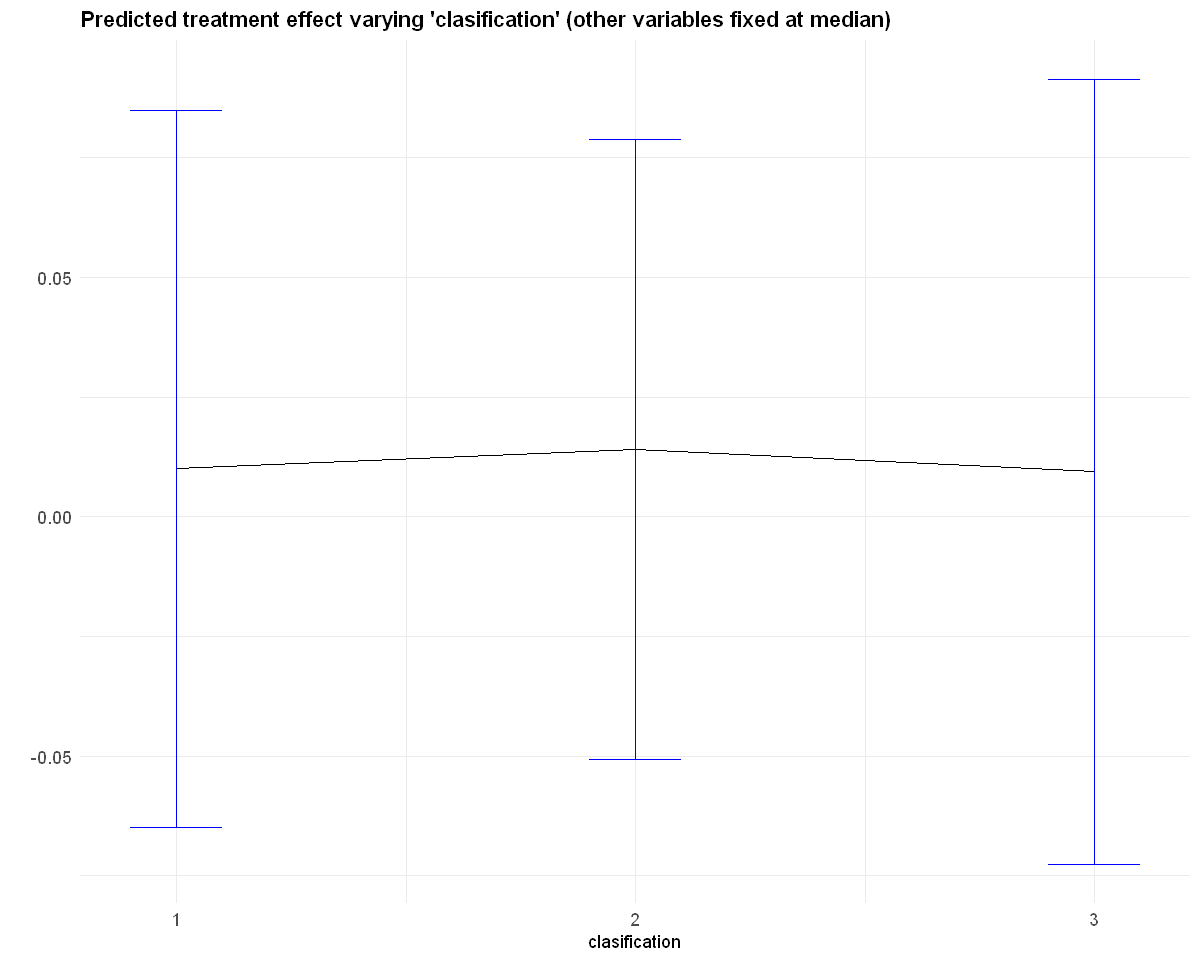

In [177]:
covariates = c("sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")
data[,"clasification"] <- as.integer(as.character(data[,"clasification"]))
data[,"level"] <- as.integer(as.character(data[,"level"]))
selected.covariate <- "clasification"
# other.covariates <- covariates
other.covariates <- covariates[which(covariates != selected.covariate)]

# Fitting a forest 
# (commented for convenience; no need re-fit if already fitted above)
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + x_dim + y_dim)
# Note: For smaller confidence intervals, set num.trees ~ sample size
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
forest.tau <- causal_forest(X, Y, W, W.hat=.5)  # few trees for speed here

# Compute a grid of values appropriate for the selected covariate
grid.size <- 3 
covariate.grid <- seq(min(data[,selected.covariate]), max(data[,selected.covariate]), length.out=grid.size)

# Other options for constructing a grid:
# For a binary variable, simply use 0 and 1
# grid.size <- 3
# covariate.grid <- c(0,2)  

# For a continuous variable, select appropriate percentiles
# percentiles <- c(1,2,3)
# grid.size <- length(percentiles)
# covariate.grid <- quantile(data[,selected.covariate], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct a dataset
data.grid <- data.frame(sapply(medians, function(x) rep(x, grid.size)), covariate.grid)
colnames(data.grid) <- c(other.covariates, selected.covariate)


# Expand the data
X.grid <- model.matrix(fmla, data.grid)

# Point predictions of the CATE and standard errors 
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)

tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)
                               
# Plot predictions for each group and 95% confidence intervals around them.
options(repr.plot.width=10, repr.plot.height=8)
data.pred <- transform(data.grid, tau.hat=tau.hat, ci.low = tau.hat - 2*tau.hat.se, ci.high = tau.hat + 2*tau.hat.se)
ggplot(data.pred) +
  geom_line(aes_string(x=selected.covariate, y="tau.hat", group = 1), color="black") +
  geom_errorbar(aes_string(x=selected.covariate, ymin="ci.low", ymax="ci.high", width=.2), color="blue") +
   ylab("") +
  ggtitle(paste0("Predicted treatment effect varying '", selected.covariate, "' (other variables fixed at median)")) +
  scale_x_continuous("clasification", breaks=covariate.grid, labels=signif(covariate.grid, 2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
       axis.text=element_text(size=11)) 

In [74]:
with(data, mean(clasification == 3))

[1] 0.4982098

In [75]:
mean(with(data, (clasification == 3) & (abs(age - median(age)) <= 30))) # at most 3 yrs away

[1] 0.4980747

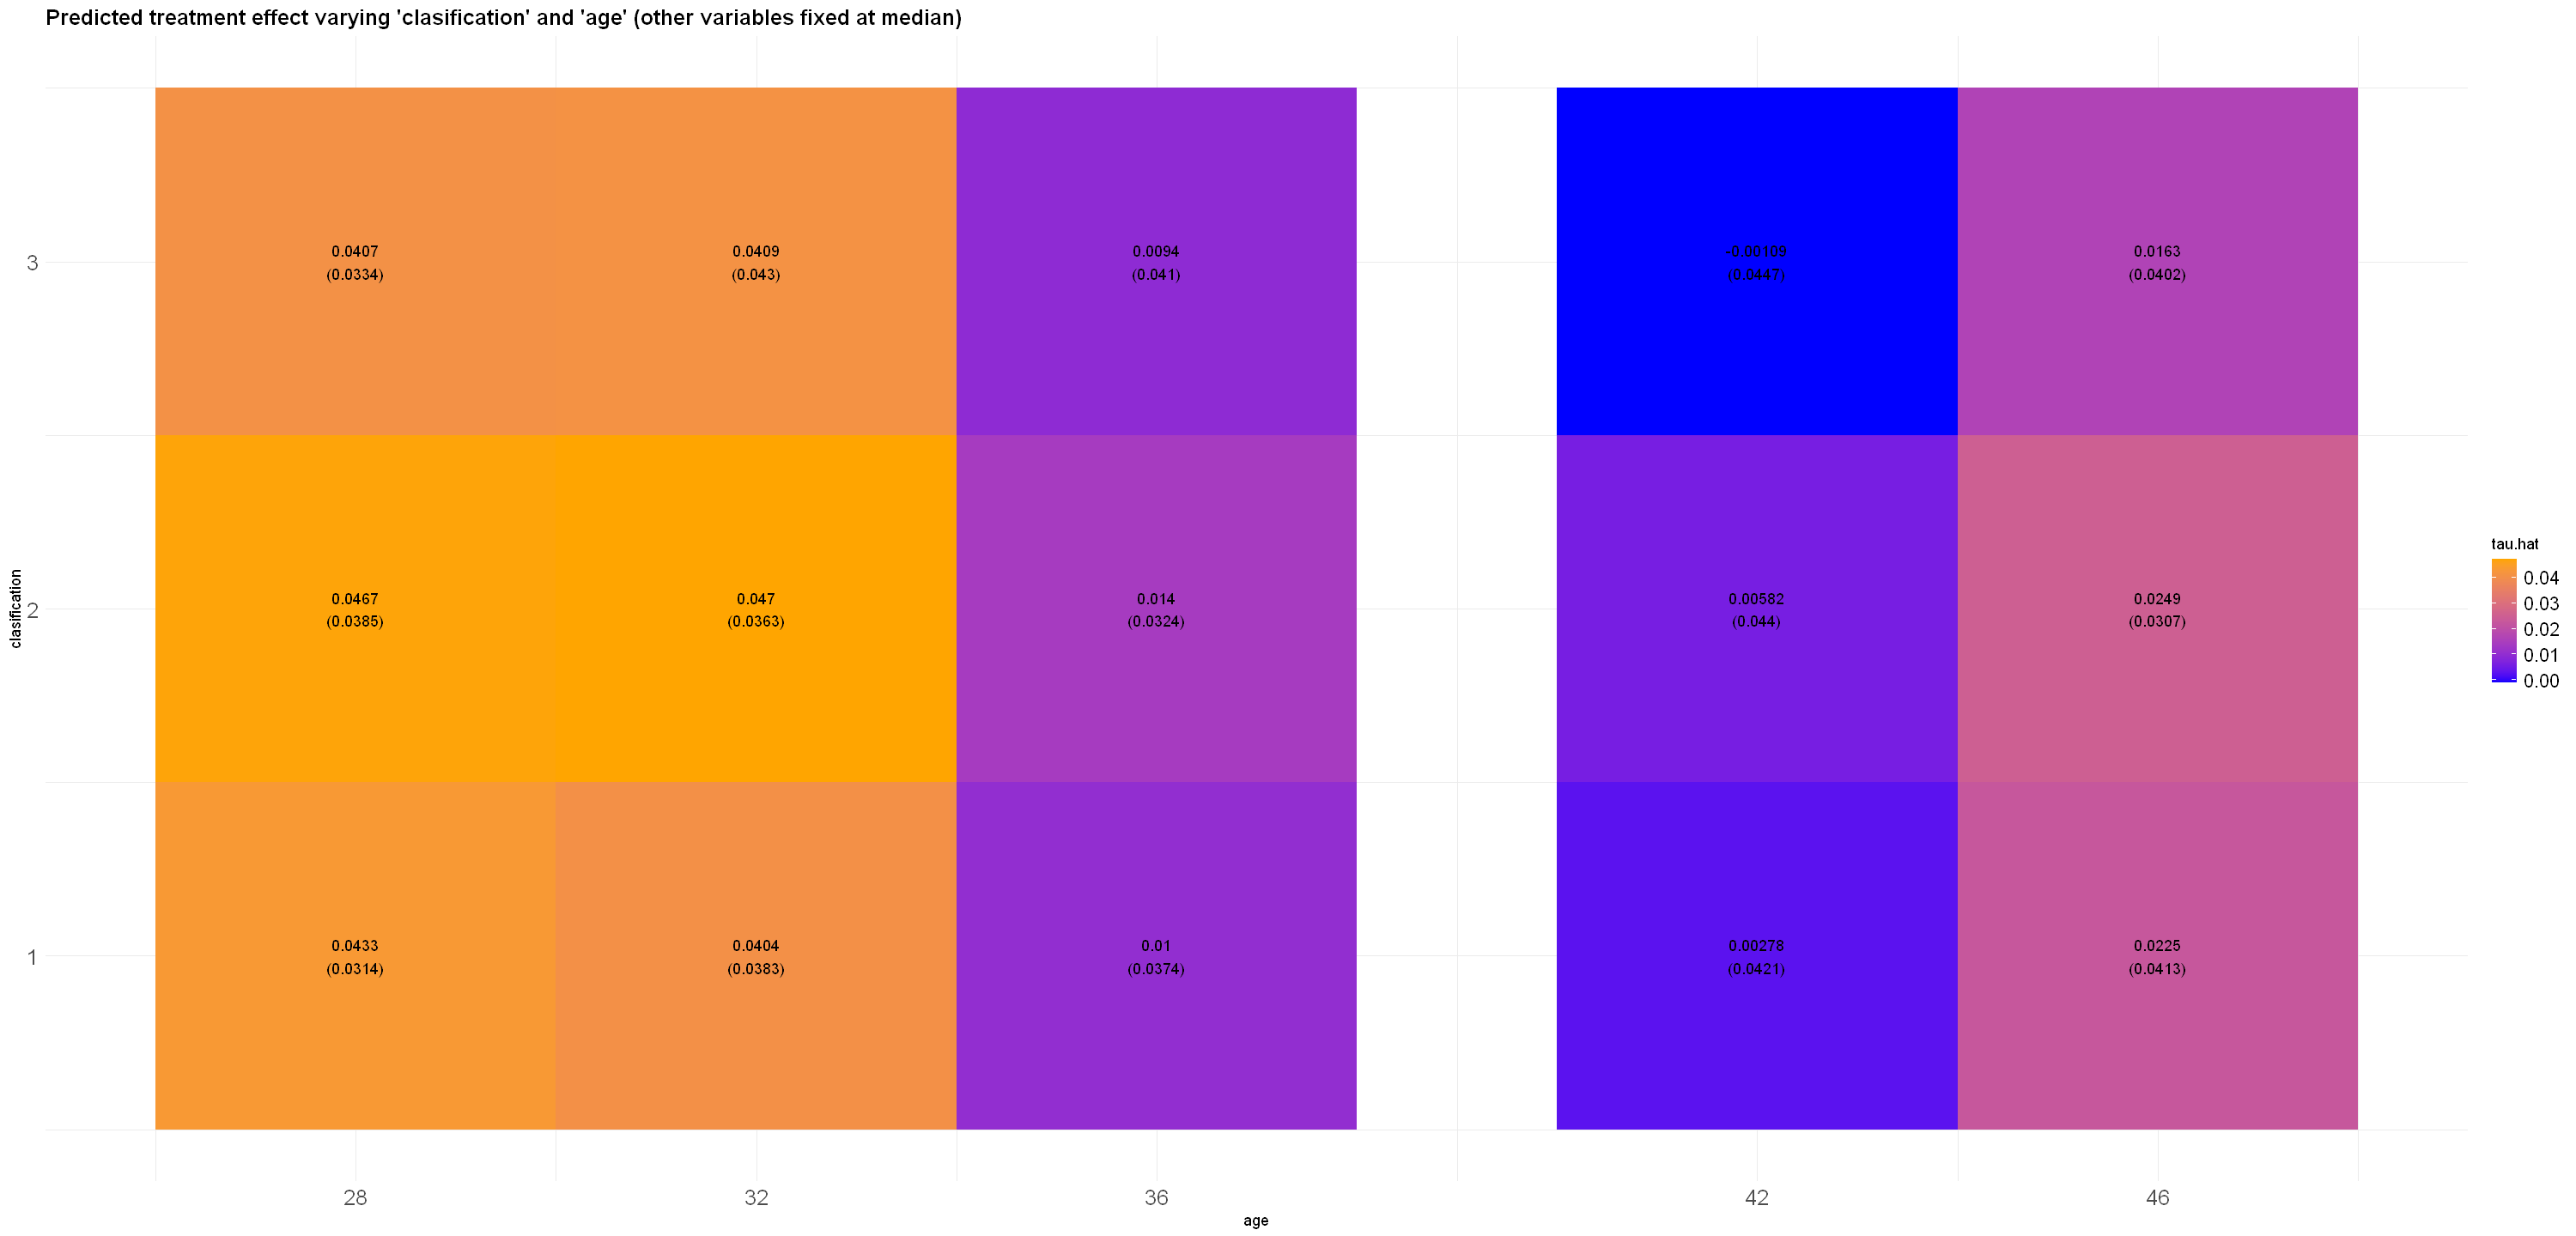

In [178]:
covariates = c("sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")

x1 <- 'clasification'
x2 <- 'age'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.
x1.grid.size <- 3
# x2.grid.size <- 48

# For a continuous variable, select appropriate percentiles
percentiles <- c(.1, .25, .5, .75, .9)
grid.size <- length(percentiles)
x2.grid <- quantile(data[,x2], probs=percentiles)

x1.grid <- seq(min(data[,x1]), max(data[,x1]), length.out=x1.grid.size)
# x2.grid <- seq(min(data[,x2]), max(data[,x2]), length.out=x2.grid.size)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=25, repr.plot.height=12)
ggplot(df) +
    aes(age, clasification) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 15, face = "bold"),
          axis.text=element_text(size=15), 
          legend.text = element_text(size=13)) 

In [179]:
X.grid

,sex,age,cpelec,cpwater,nlat_ie,nlong_ie,clasification,level
1,1,28,1,0.5,-8.6239,-76.10851,1,2
2,1,28,1,0.5,-8.6239,-76.10851,2,2
3,1,28,1,0.5,-8.6239,-76.10851,3,2
4,1,32,1,0.5,-8.6239,-76.10851,1,2
5,1,32,1,0.5,-8.6239,-76.10851,2,2
6,1,32,1,0.5,-8.6239,-76.10851,3,2
7,1,36,1,0.5,-8.6239,-76.10851,1,2
8,1,36,1,0.5,-8.6239,-76.10851,2,2
9,1,36,1,0.5,-8.6239,-76.10851,3,2
10,1,42,1,0.5,-8.6239,-76.10851,1,2


In [87]:
x2.grid

10% 25% 50% 75% 90% 
 28  32  36  42  46

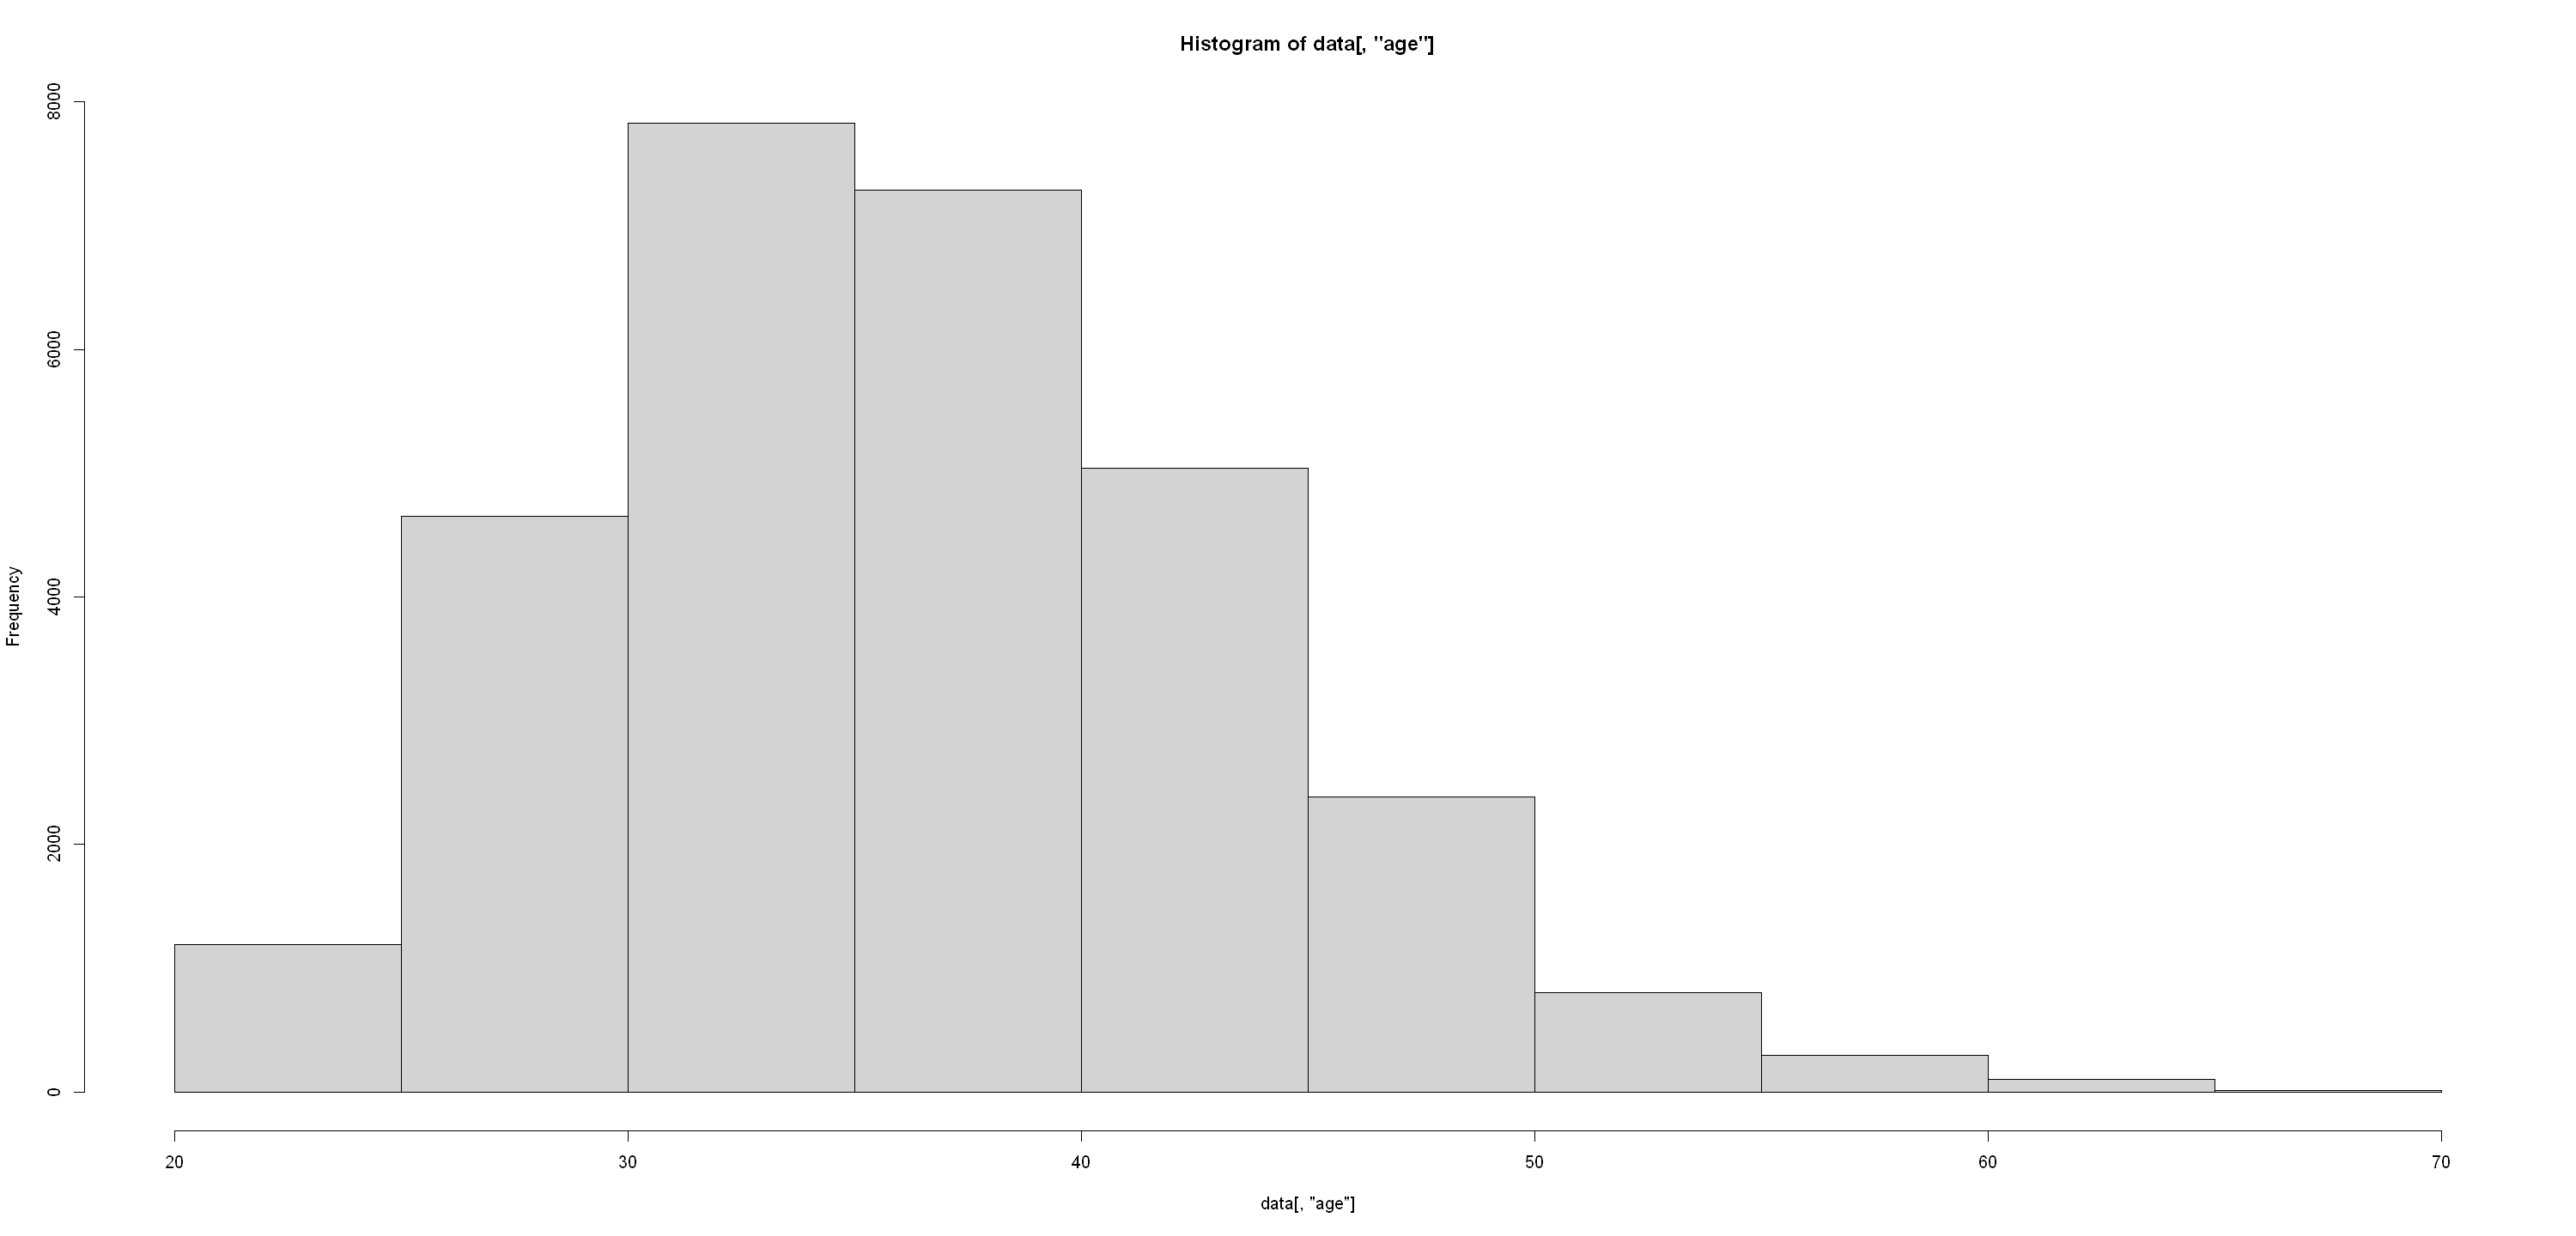

In [83]:
hist(data[,"age"])

## 2. Using BLOCKS

In [89]:
covariates = c("sex", "age", "cpelec", "cpwater", "x_dim", "y_dim", "clasification", "level")

fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)

In [90]:
# Preparing data to fit a causal forest
# fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [91]:
forest.tau <- causal_forest(XX, Y, W)

In [92]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

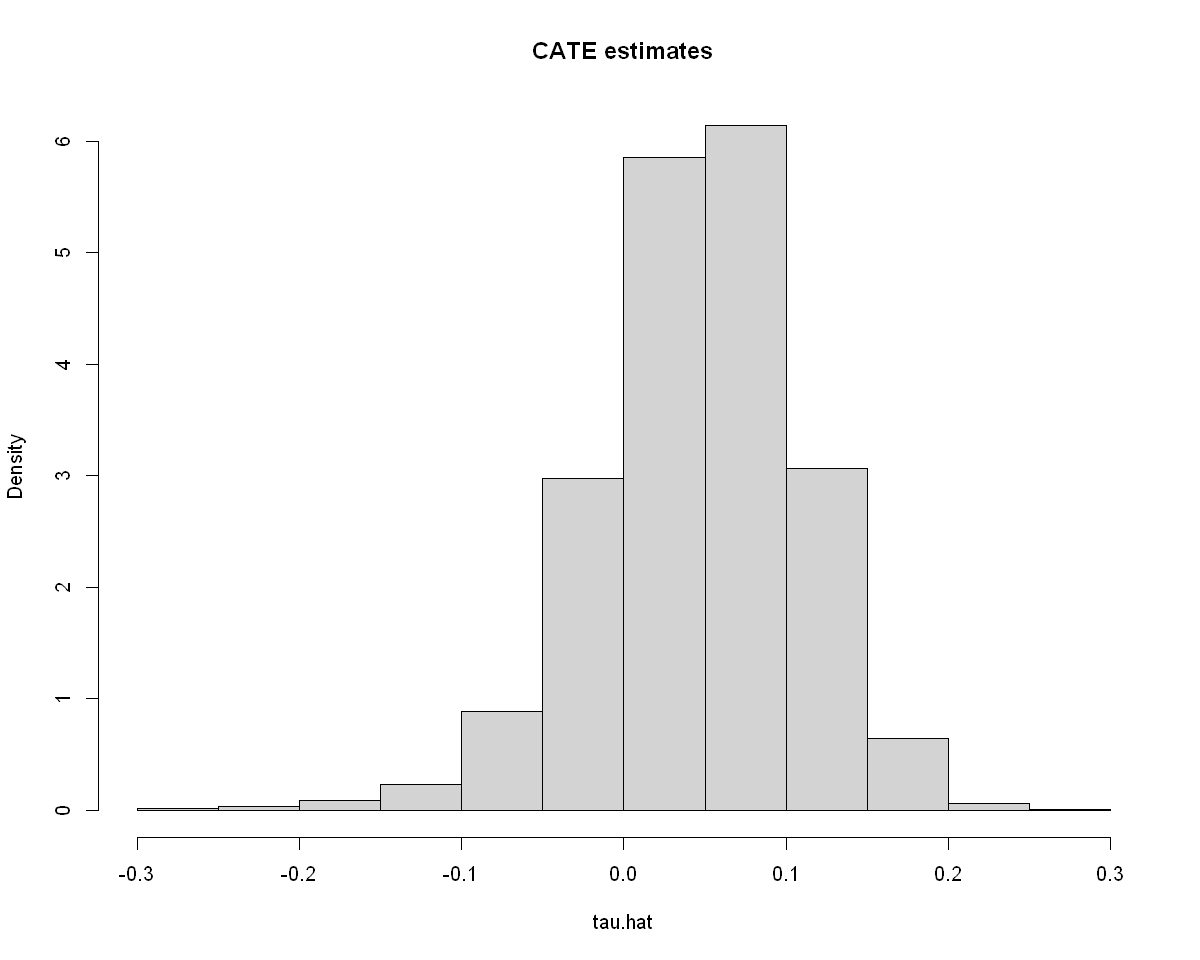

In [93]:
options(repr.plot.width=10, repr.plot.height=8)
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

In [94]:
# measure of variable importance that indicates how often a variable was used in a tree split. 
var_imp <- c(variable_importance(forest.tau))
names(var_imp) <- covariates
sorted_var_imp <- sort(var_imp, decreasing = TRUE)
sorted_var_imp[1:5]  # showing only first few

<NA>       <NA>    cpwater       <NA>     cpelec 
0.36732868 0.32236523 0.13760487 0.07162636 0.02472441

### Data-driven subgroups

In [95]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

covariates = c( "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")

# Prepare dataset
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
n <- nrow(data)

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 10
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, W.hat=.5, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions


# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [96]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
ols,Q1,-0.0001077031,0.01188537
ols,Q2,0.0238723409,0.01187356
ols,Q3,0.0516301522,0.01198619
ols,Q4,0.0792016887,0.01214573
ols,Q5,0.0580489709,0.01202805


In [97]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)
ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
aipw,Q1,0.001684667,0.01147199
aipw,Q2,0.017303964,0.01142415
aipw,Q3,0.039360301,0.01146816
aipw,Q4,0.055757297,0.01157412
aipw,Q5,0.029819996,0.01150018


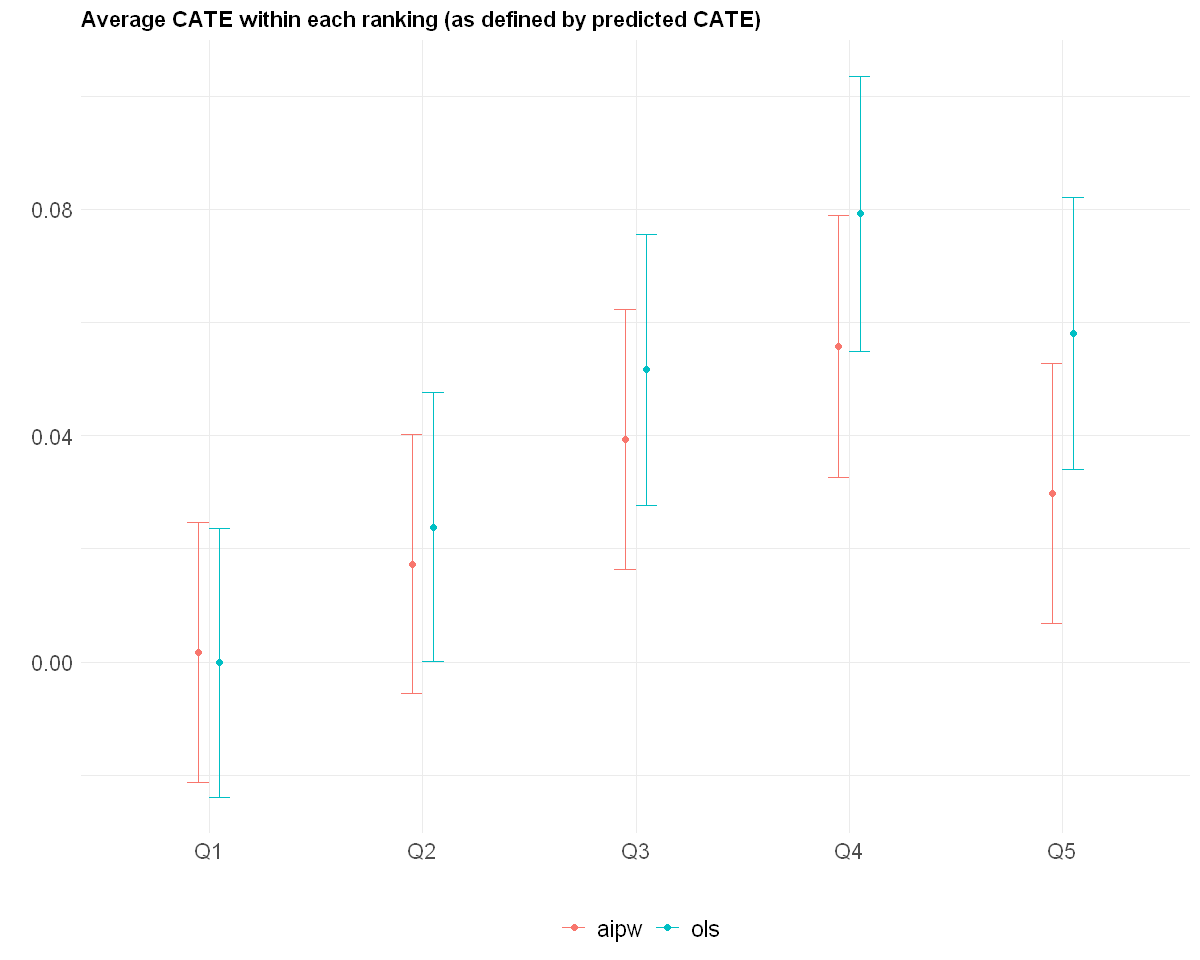

In [98]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
options(repr.plot.width=10, repr.plot.height=8)
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method, fig(50,50)) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
        axis.text=element_text(size=13), 
        legend.position="bottom", legend.title = element_blank(), legend.text = element_text(size=14))

### Test predictions using difference-in-means estimator

In [99]:
# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.02398004,0.01694683,1.570741e-01,0.1595
Rank 3 - Rank 1,0.05173786,0.01704759,2.408183e-03,0.0066
Rank 4 - Rank 1,0.07930939,0.01720569,4.053484e-06,0.0000
Rank 5 - Rank 1,0.05815667,0.01712232,6.833296e-04,0.0023


In [100]:
# Valid in randomized and observational settings with unconfoundedness+overlap.

# Using AIPW scores computed above
ols <- lm(aipw.scores ~ 1 + factor(ranking))
res <- summary_rw_lm(ols, indices=2:num.rankings)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.01561930,0.01624377,0.3362805220,0.3356
Rank 3 - Rank 1,0.03767563,0.01624377,0.0203806991,0.0535
Rank 4 - Rank 1,0.05407263,0.01624309,0.0008727638,0.0027
Rank 5 - Rank 1,0.02813533,0.01624446,0.0832847805,0.1477


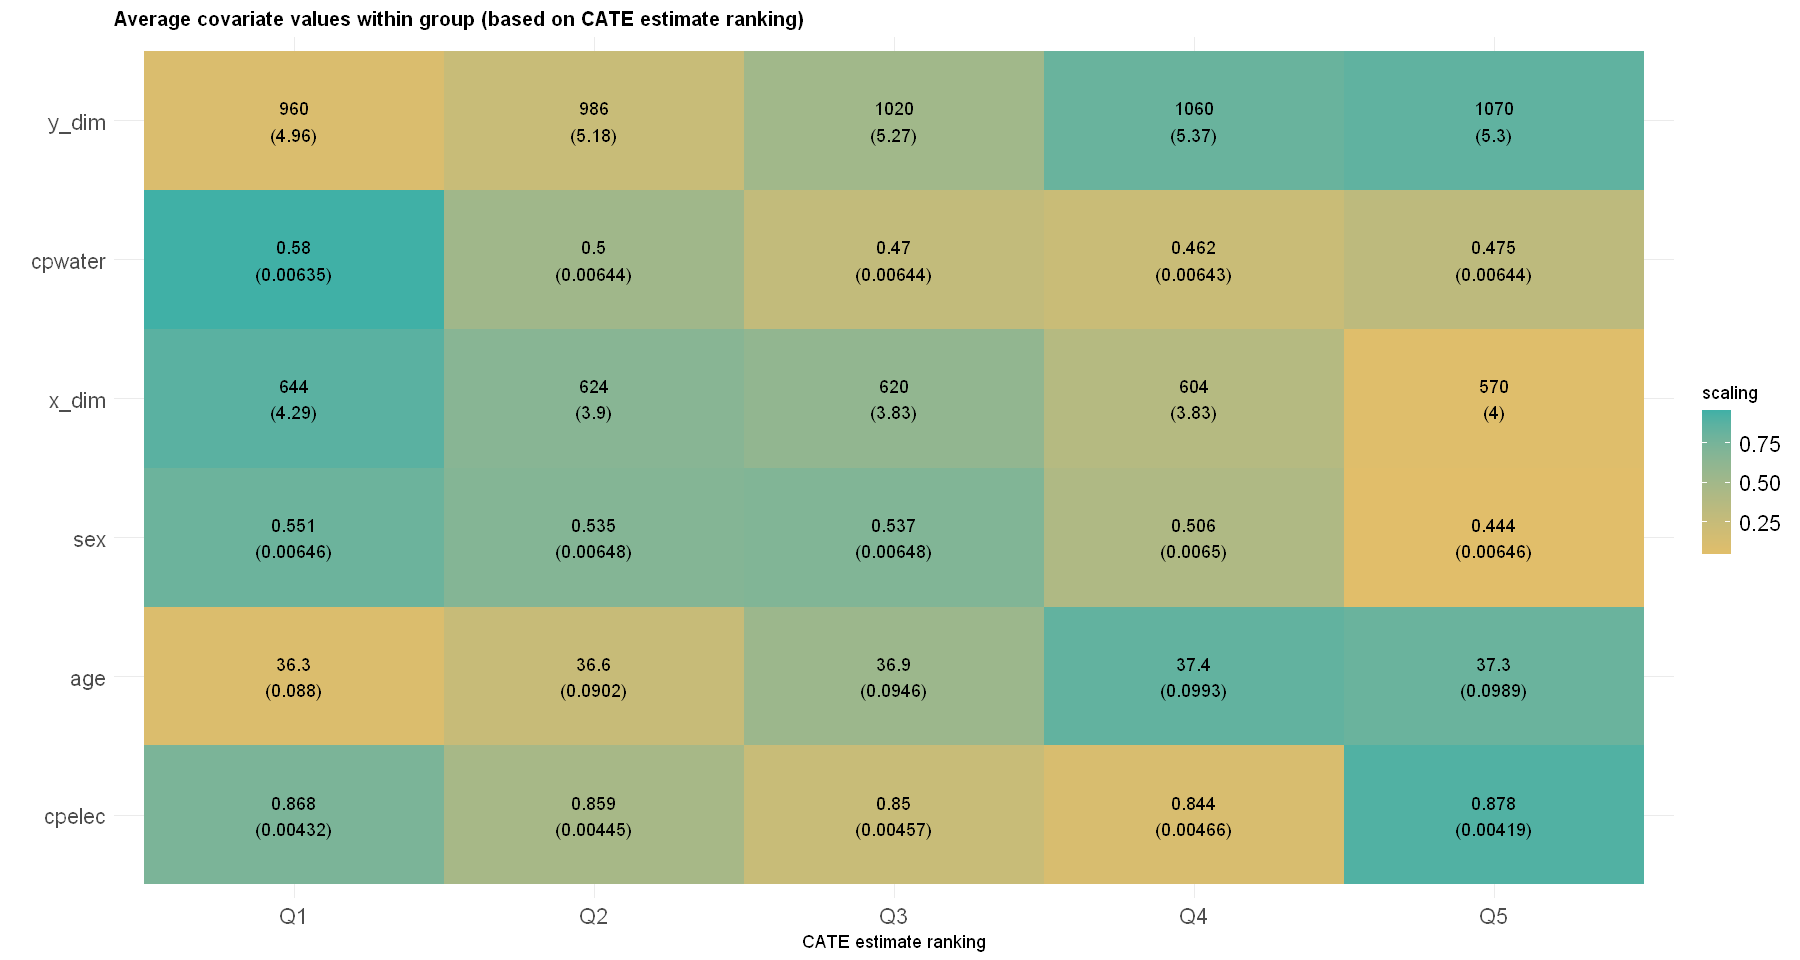

In [102]:
covariates = c( "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim")
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)
df <- do.call(rbind, df)


# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

options(repr.plot.width=15, repr.plot.height=8)
# plot heatmap
ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

### Best linear projection

In [103]:
# Best linear projection of the conditional average treatment effect on covariates
best_linear_projection(forest.tau, X)

Warning message in best_linear_projection(forest.tau, X):
"Estimated treatment propensities take values between 0.071 and 1 and in particular get very close to 0 or 1."



Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                          Estimate  Std. Error t value Pr(>|t|)   
(Intercept)             6.6716e-02  5.9573e-02  1.1199  0.26277   
sex                    -3.2967e-02  1.0703e-02 -3.0802  0.00207 **
age                     7.3020e-04  6.3683e-04  1.1466  0.25155   
factor.level.2         -3.1232e-02  1.5010e-02 -2.0808  0.03746 * 
factor.level.3         -2.3699e-02  1.8826e-02 -1.2589  0.20809   
factor.clasification.2 -1.8738e-03  1.6190e-02 -0.1157  0.90786   
factor.clasification.3 -1.0844e-02  1.7594e-02 -0.6164  0.53765   
cpelec                 -9.7895e-03  1.6641e-02 -0.5883  0.55635   
cpwater                -1.5823e-02  9.8670e-03 -1.6037  0.10880   
x_dim                   2.1561e-06  2.9869e-05  0.0722  0.94246   
y_dim                   1.2575e-05  2.3675e-05  0.5312  0.59530   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

### Assessing heterogeneity

In [104]:
test_calibration(forest.tau)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction          1.00311    0.16820  5.9638 1.246e-09 ***
differential.forest.prediction  0.67253    0.13029  5.1620 1.230e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Partial dependence

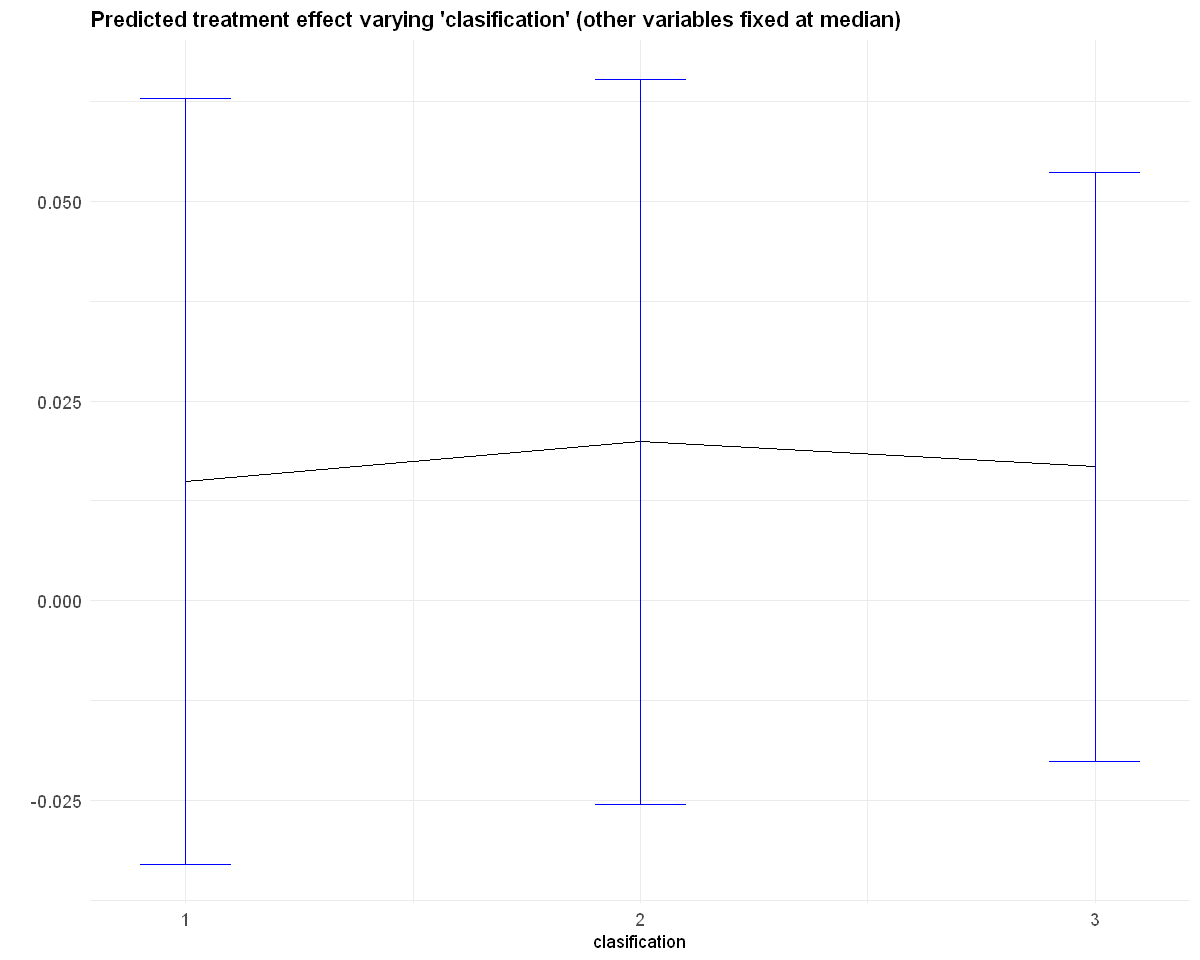

In [180]:
covariates = c("sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")
selected.covariate <- "clasification"
# other.covariates <- covariates
other.covariates <- covariates[which(covariates != selected.covariate)]

# Fitting a forest 
# (commented for convenience; no need re-fit if already fitted above)
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + x_dim + y_dim)
# Note: For smaller confidence intervals, set num.trees ~ sample size
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
forest.tau <- causal_forest(X, Y, W, W.hat=.5)  # few trees for speed here

# Compute a grid of values appropriate for the selected covariate
grid.size <- 3 
covariate.grid <- seq(min(data[,selected.covariate]), max(data[,selected.covariate]), length.out=grid.size)

# Other options for constructing a grid:
# For a binary variable, simply use 0 and 1
# grid.size <- 3
# covariate.grid <- c(0,2)  

# For a continuous variable, select appropriate percentiles
# percentiles <- c(1,2,3)
# grid.size <- length(percentiles)
# covariate.grid <- quantile(data[,selected.covariate], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct a dataset
data.grid <- data.frame(sapply(medians, function(x) rep(x, grid.size)), covariate.grid)
colnames(data.grid) <- c(other.covariates, selected.covariate)


# Expand the data
X.grid <- model.matrix(fmla, data.grid)

# Point predictions of the CATE and standard errors 
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)

tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)
                               
# Plot predictions for each group and 95% confidence intervals around them.
options(repr.plot.width=10, repr.plot.height=8)
data.pred <- transform(data.grid, tau.hat=tau.hat, ci.low = tau.hat - 2*tau.hat.se, ci.high = tau.hat + 2*tau.hat.se)
ggplot(data.pred) +
  geom_line(aes_string(x=selected.covariate, y="tau.hat", group = 1), color="black") +
  geom_errorbar(aes_string(x=selected.covariate, ymin="ci.low", ymax="ci.high", width=.2), color="blue") +
   ylab("") +
  ggtitle(paste0("Predicted treatment effect varying '", selected.covariate, "' (other variables fixed at median)")) +
  scale_x_continuous("clasification", breaks=covariate.grid, labels=signif(covariate.grid, 2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
       axis.text=element_text(size=11)) 

In [181]:
with(data, mean(clasification == 3))

[1] 0.4982098

In [182]:
mean(with(data, (clasification == 3) & (abs(age - median(age)) <= 30))) # at most 3 yrs away

[1] 0.4980747

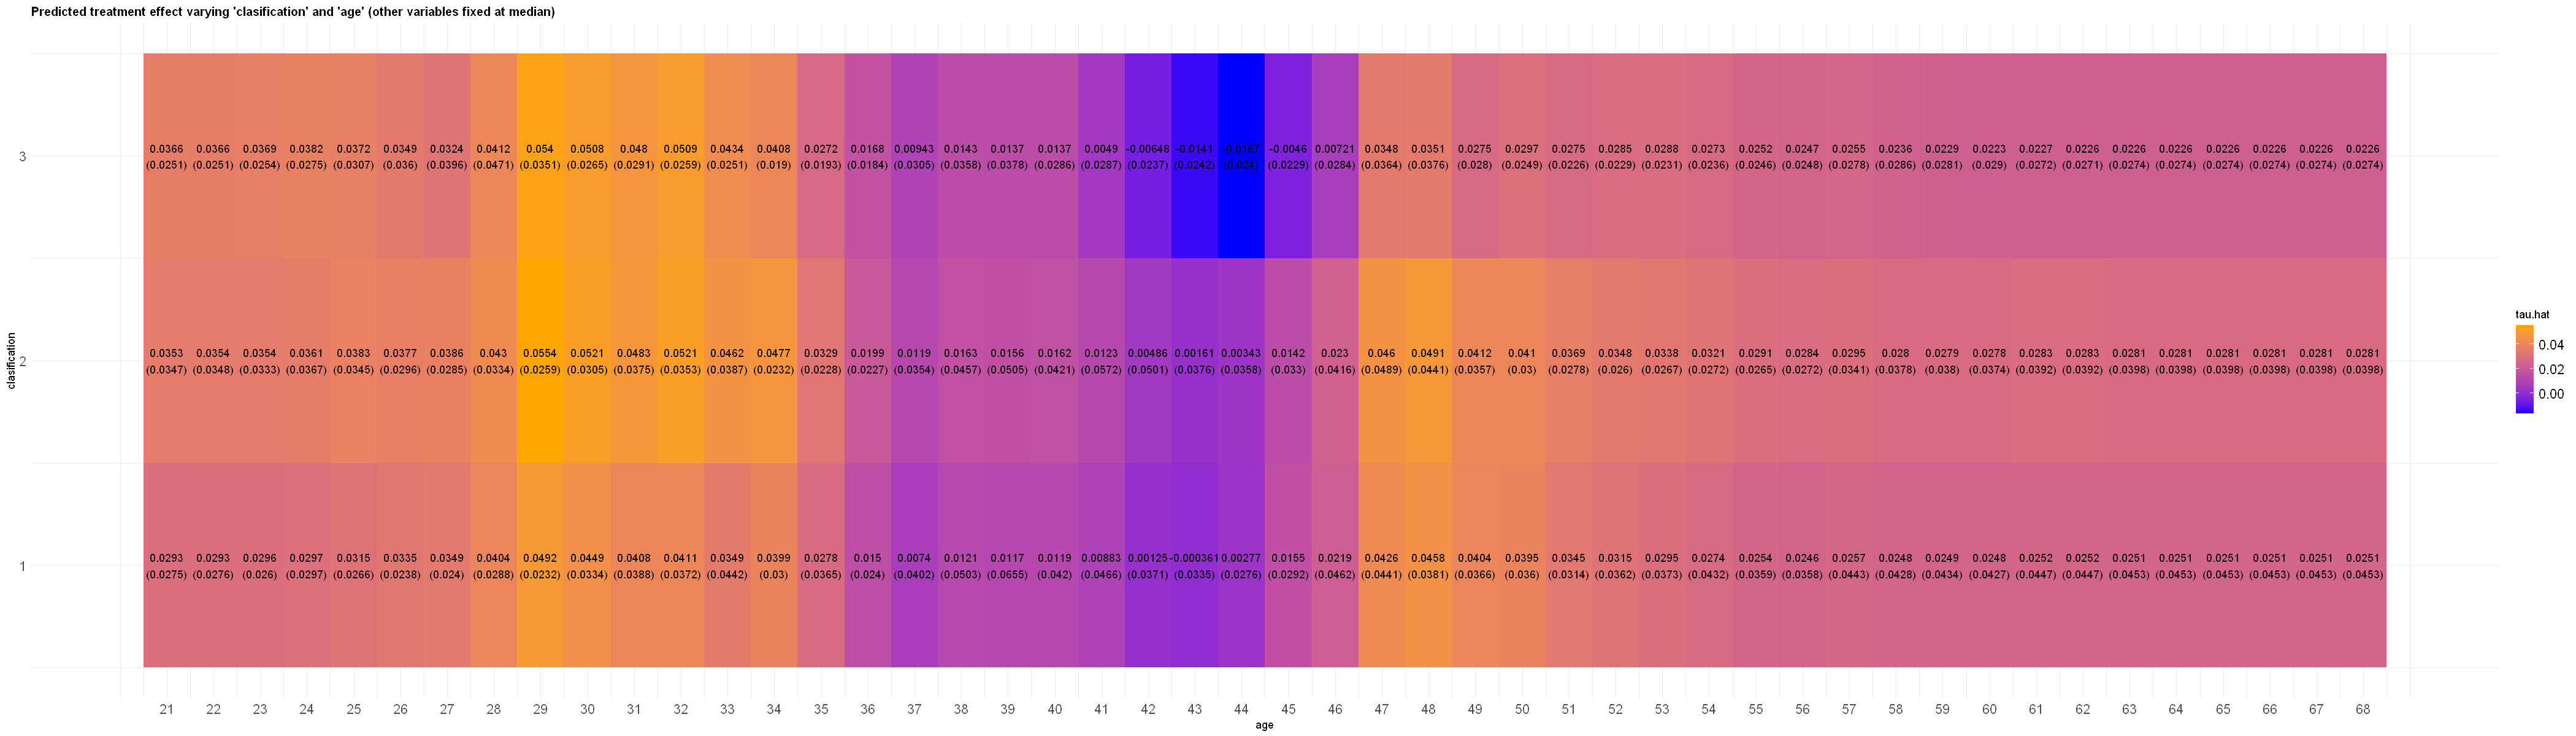

In [183]:
covariates = c("sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")

x1 <- 'clasification'
x2 <- 'age'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.
x1.grid.size <- 3
x2.grid.size <- 48

x1.grid <- seq(min(data[,x1]), max(data[,x1]), length.out=x1.grid.size)
x2.grid <- seq(min(data[,x2]), max(data[,x2]), length.out=x2.grid.size)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=35, repr.plot.height=10)
ggplot(df) +
    aes(age, clasification) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

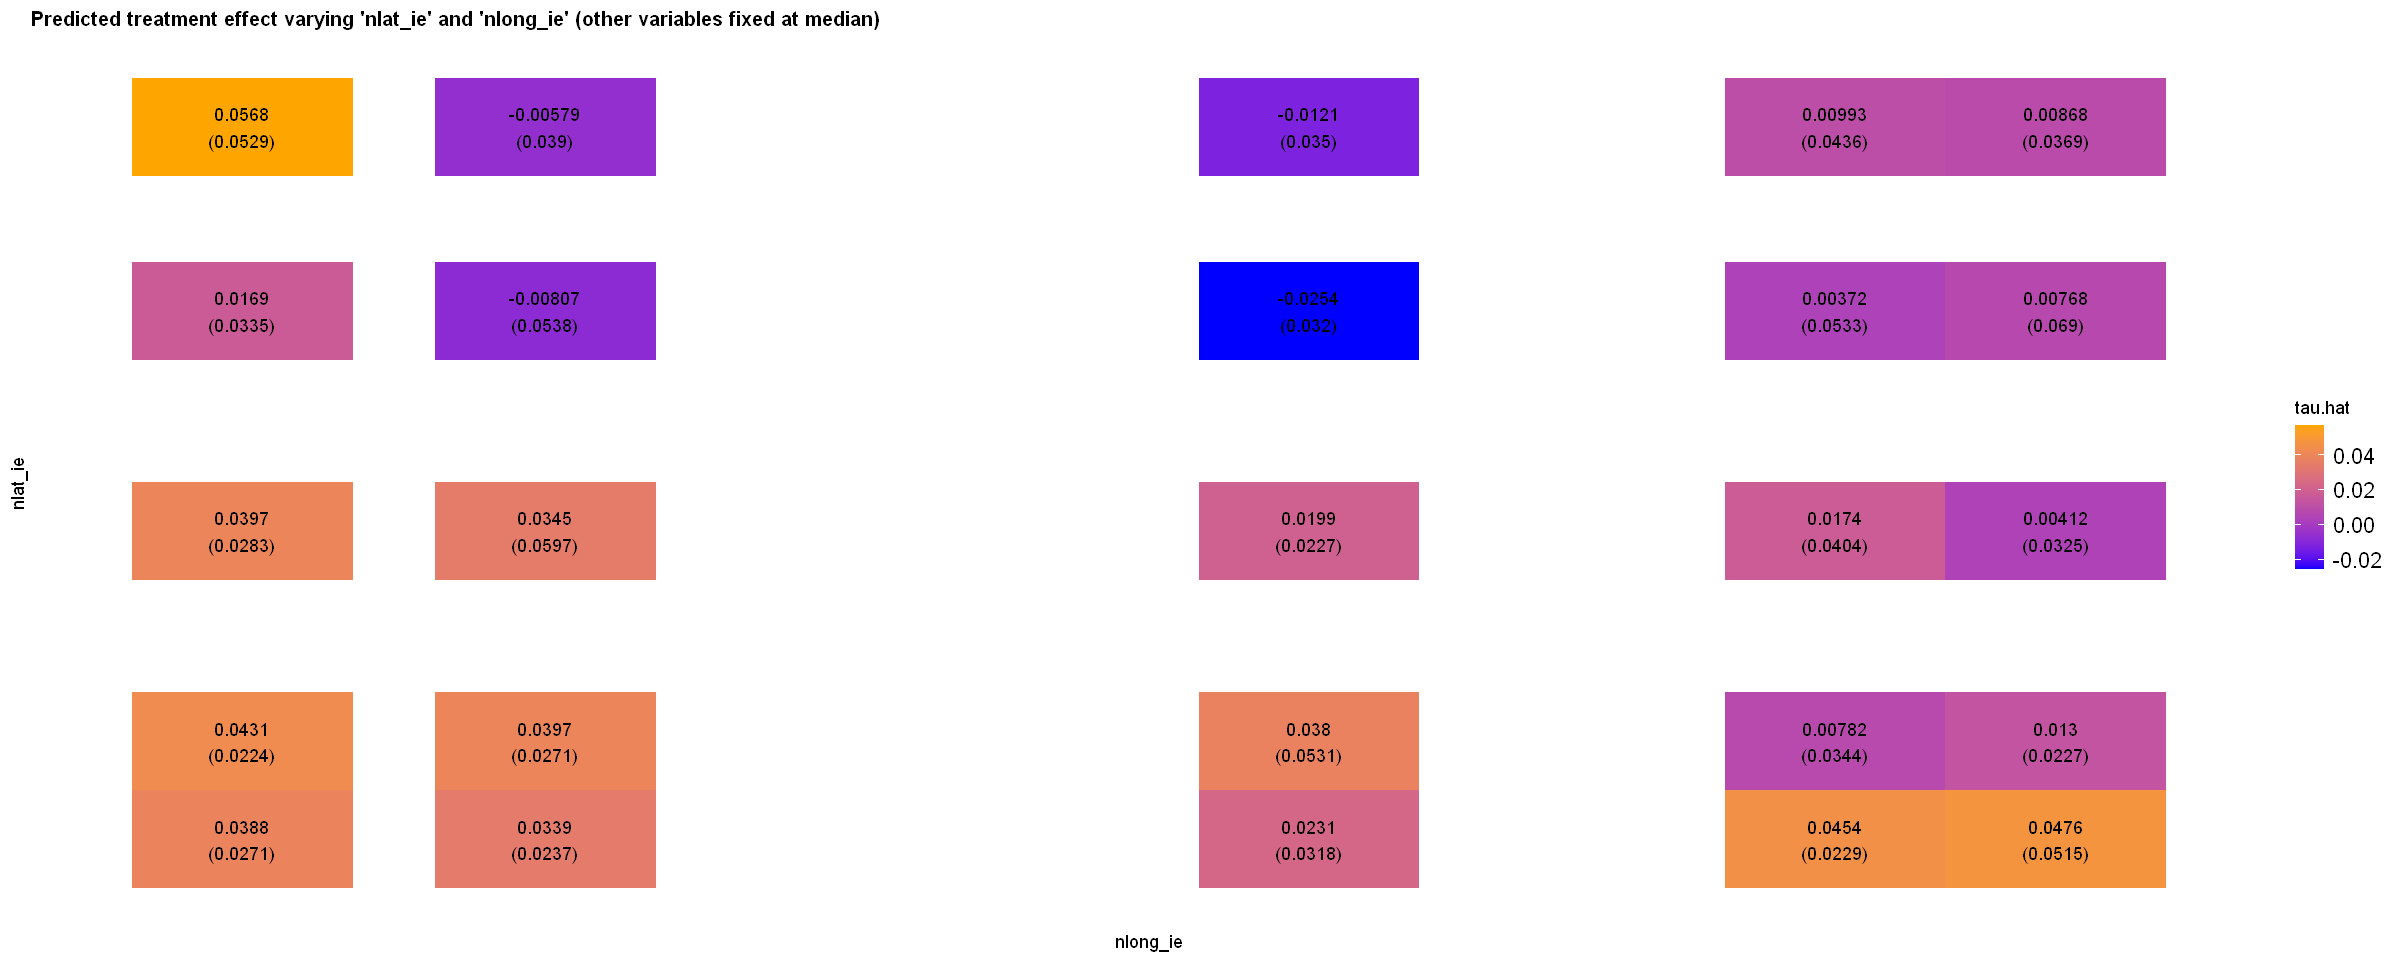

In [184]:
covariates = c( "sex", "age", "cpelec", "cpwater",  "nlat_ie" , "nlong_ie", "clasification", "level")
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))

x1 <- 'nlat_ie'
x2 <- 'nlong_ie'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.

percentiles <- c(0.1, 0.25, 0.5, 0.75, 0.9)
grid.size <- length(percentiles)
x1.grid <- quantile(data[,x1], probs=percentiles)

# x2.grid.size <- length(percentiles)
x2.grid <- quantile(data[,x2], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=20, repr.plot.height=8)
ggplot(df) +
    aes(nlat_ie, nlong_ie) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("nlat_ie", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("nlong_ie", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

In [188]:
x2.grid

10%       25%       50%       75%       90% 
-79.18822 -78.20873 -76.10851 -73.91166 -72.07256

In [187]:
x1.grid

10%        25%        50%        75%        90% 
-14.108400 -12.550440  -8.623900  -5.915680  -4.782045

In [185]:
X.grid

,sex,age,cpelec,cpwater,nlat_ie,nlong_ie,clasification,level
1,1,36,1,0.5,-14.108400,-79.18822,2,2
2,1,36,1,0.5,-12.550440,-79.18822,2,2
3,1,36,1,0.5,-8.623900,-79.18822,2,2
4,1,36,1,0.5,-5.915680,-79.18822,2,2
5,1,36,1,0.5,-4.782045,-79.18822,2,2
6,1,36,1,0.5,-14.108400,-78.20873,2,2
7,1,36,1,0.5,-12.550440,-78.20873,2,2
8,1,36,1,0.5,-8.623900,-78.20873,2,2
9,1,36,1,0.5,-5.915680,-78.20873,2,2
10,1,36,1,0.5,-4.782045,-78.20873,2,2


In [186]:
# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
forest.pred

predictions,variance.estimates
<dbl>,<dbl>
0.038774037,0.0007329796
0.033891968,0.0005599689
0.023068107,0.0010102970
0.045402230,0.0005265871
0.047583975,0.0026490186
0.043127327,0.0005027575
0.039726434,0.0007352525
0.038042005,0.0028192141
0.007818413,0.0011818243


In [169]:
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

sex,age,cpelec,cpwater,clasification,level,nlat_ie,nlong_ie,NA,NA.1,...,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-14.108400,-79.18822
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-12.550440,-79.18822
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-8.623900,-79.18822
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-5.915680,-79.18822
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-4.782045,-79.18822
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-14.108400,-78.20873
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-12.550440,-78.20873
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-8.623900,-78.20873
1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,2,2,2,1,1.5,2,2,1.5,-5.915680,-78.20873
